<span style="font-size: 24px; font-weight: bold;">Market Mix Models using Advanced Regression Methods</span>

**Importing Libraries**

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

**Load the excel file for Sales Data**

In [125]:
file_path1 = pd.read_excel("Sales Data.xlsx")

In [126]:
#Load the sheets into separate dataframe
sales_data = pd.read_excel("Sales Data.xlsx",sheet_name='Sales')
distribution_data = pd.read_excel("Sales Data.xlsx",sheet_name='Distribution')
shipment_data = pd.read_excel("Sales Data.xlsx",sheet_name='Shipment')


<div style="font-size:22px;">
Raw Sales Data
</div>

In [127]:
#Display first few rows of distirbution sheets
distribution_data.head()

,Unnamed: 0,WTD,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,NUMD,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,100,100,99,96,NaN,48,46,46,40
2,2011-08-01 00:00:00,100,99,99,96,NaN,48,46,46,40
3,2011-09-01 00:00:00,100,99,99,95,NaN,48,46,46,39
4,2011-10-01 00:00:00,99,99,99,94,NaN,48,46,46,38


In [128]:
#Display first few rows of shipment sheets
shipment_data.head()

,Unnamed: 0,Shipment SU,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Volume (SU),Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,111110.765,43869.0272,59022.5266,8219.2112,NaN,85935.6,36127.4,40971.6,8835.6
2,2011-08-01 00:00:00,98568.474,48970.128,40447.5286,9150.8174,NaN,95135.2,40373.7,44402.1,10359.4
3,2011-09-01 00:00:00,122461.0034,54010.9639,58820.3602,9629.6793,NaN,85814,36034.5,40029.2,9750.3
4,2011-10-01 00:00:00,134933.0212,60733.5058,63417.0106,10782.5048,NaN,88047.7,36697.8,42431.3,8918.6


In [129]:
#Display first few rows of sales data
sales_data.head()

,Unnamed: 0,Value ('000 HKD),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Volume (SU),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Avg Price per SU,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Avg Price per USD,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,28518.3,12706.5,12196.9,3614.4,NaN,85935.6,36127.4,40971.6,8835.6,NaN,331.856646,351.713658,297.691572,409.072389,NaN,43.141364,45.722776,38.699904,53.179411
2,2011-08-01 00:00:00,31712.5,14190.5,13250.5,4271.6,NaN,95135.2,40373.7,44402.1,10359.4,NaN,333.341392,351.478809,298.42057,412.340483,NaN,43.334381,45.692245,38.794674,53.604263
3,2011-09-01 00:00:00,28436.8,12422.5,11946.7,4067.6,NaN,85814,36034.5,40029.2,9750.3,NaN,331.377165,344.73907,298.449632,417.176907,NaN,43.079031,44.816079,38.798452,54.232998
4,2011-10-01 00:00:00,29048.8,12652.5,12690.9,3705.5,NaN,88047.7,36697.8,42431.3,8918.6,NaN,329.921168,344.775436,299.092887,415.480008,NaN,42.889752,44.820807,38.882075,54.012401



<span style="font-size: 24px; font-weight: bold;">Data Pre-processing for Sales Excel File</span>

<div style="font-size:22px;">
Data Cleaning for Sales Data
</div>

In [130]:
#Renaming the columns
sales_data.columns = ['Period','Brand_Sales_Value','V1_Sales_Value','V2_Sales_Value','V3_Sales_Value','V4_Sales_Value','Brand_Volume','V1_Volume','V2_Volume','V3_Volume','V4_Volume',
               'Brand_AvgPricePer_SU','V1_AvgPricePer_SU','V2_AvgPricePer_SU','V3_AvgPricePer_SU','V4_AvgPricePer_SU','Brand_AvgPricePer_USD','V1_AvgPricePer_USD',
               'V2_AvgPricePer_USD','V3_AvgPricePer_USD']
sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,V4_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,V4_Volume,Brand_AvgPricePer_SU,V1_AvgPricePer_SU,V2_AvgPricePer_SU,V3_AvgPricePer_SU,V4_AvgPricePer_SU,Brand_AvgPricePer_USD,V1_AvgPricePer_USD,V2_AvgPricePer_USD,V3_AvgPricePer_USD
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,28518.3,12706.5,12196.9,3614.4,NaN,85935.6,36127.4,40971.6,8835.6,NaN,331.856646,351.713658,297.691572,409.072389,NaN,43.141364,45.722776,38.699904,53.179411
2,2011-08-01 00:00:00,31712.5,14190.5,13250.5,4271.6,NaN,95135.2,40373.7,44402.1,10359.4,NaN,333.341392,351.478809,298.42057,412.340483,NaN,43.334381,45.692245,38.794674,53.604263
3,2011-09-01 00:00:00,28436.8,12422.5,11946.7,4067.6,NaN,85814,36034.5,40029.2,9750.3,NaN,331.377165,344.73907,298.449632,417.176907,NaN,43.079031,44.816079,38.798452,54.232998
4,2011-10-01 00:00:00,29048.8,12652.5,12690.9,3705.5,NaN,88047.7,36697.8,42431.3,8918.6,NaN,329.921168,344.775436,299.092887,415.480008,NaN,42.889752,44.820807,38.882075,54.012401


In [131]:
#Deleting extra columns
sales_data= sales_data.drop(columns=['V4_Sales_Value','V4_Volume','V4_AvgPricePer_SU'])
sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,V1_AvgPricePer_SU,V2_AvgPricePer_SU,V3_AvgPricePer_SU,Brand_AvgPricePer_USD,V1_AvgPricePer_USD,V2_AvgPricePer_USD,V3_AvgPricePer_USD
0,Period,Brand,V1,V2,V3,Brand,V1,V2,V3,Brand,V1,V2,V3,Brand,V1,V2,V3
1,2011-07-01 00:00:00,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,351.713658,297.691572,409.072389,43.141364,45.722776,38.699904,53.179411
2,2011-08-01 00:00:00,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,351.478809,298.42057,412.340483,43.334381,45.692245,38.794674,53.604263
3,2011-09-01 00:00:00,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,344.73907,298.449632,417.176907,43.079031,44.816079,38.798452,54.232998
4,2011-10-01 00:00:00,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,344.775436,299.092887,415.480008,42.889752,44.820807,38.882075,54.012401


In [132]:
#Deleting row at index=0
sales_data = sales_data.drop(index=0)
sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,V1_AvgPricePer_SU,V2_AvgPricePer_SU,V3_AvgPricePer_SU,Brand_AvgPricePer_USD,V1_AvgPricePer_USD,V2_AvgPricePer_USD,V3_AvgPricePer_USD
1,2011-07-01 00:00:00,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,351.713658,297.691572,409.072389,43.141364,45.722776,38.699904,53.179411
2,2011-08-01 00:00:00,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,351.478809,298.42057,412.340483,43.334381,45.692245,38.794674,53.604263
3,2011-09-01 00:00:00,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,344.73907,298.449632,417.176907,43.079031,44.816079,38.798452,54.232998
4,2011-10-01 00:00:00,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,344.775436,299.092887,415.480008,42.889752,44.820807,38.882075,54.012401
5,2011-11-01 00:00:00,30463.54,13737.66,12723.97,4001.9,92028.93,39742.8,42395,9891.13,331.021343,345.66412,300.129025,404.594824,43.032775,44.936336,39.016773,52.597327


<div style="font-size:22px;">
Data Cleaning for Distribution Data
</div>

In [133]:
#Renaming the columns
distribution_data.columns =['Period','Brand_WTD','V1_WTD','V2_WTD','V3_WTD','V4_WTD','Brand_NUMD','V1_NUMD','V2_NUMD','V3_NUMD']
distribution_data.head()

,Period,Brand_WTD,V1_WTD,V2_WTD,V3_WTD,V4_WTD,Brand_NUMD,V1_NUMD,V2_NUMD,V3_NUMD
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,100,100,99,96,NaN,48,46,46,40
2,2011-08-01 00:00:00,100,99,99,96,NaN,48,46,46,40
3,2011-09-01 00:00:00,100,99,99,95,NaN,48,46,46,39
4,2011-10-01 00:00:00,99,99,99,94,NaN,48,46,46,38


In [134]:
#Deleting the specific column
distribution_data = distribution_data.drop(columns=['V4_WTD'])
distribution_data.head()

,Period,Brand_WTD,V1_WTD,V2_WTD,V3_WTD,Brand_NUMD,V1_NUMD,V2_NUMD,V3_NUMD
0,Period,Brand,V1,V2,V3,Brand,V1,V2,V3
1,2011-07-01 00:00:00,100,100,99,96,48,46,46,40
2,2011-08-01 00:00:00,100,99,99,96,48,46,46,40
3,2011-09-01 00:00:00,100,99,99,95,48,46,46,39
4,2011-10-01 00:00:00,99,99,99,94,48,46,46,38


In [135]:
#Deleting row based on index
distribution_data = distribution_data.drop(index=0)
distribution_data.head()

,Period,Brand_WTD,V1_WTD,V2_WTD,V3_WTD,Brand_NUMD,V1_NUMD,V2_NUMD,V3_NUMD
1,2011-07-01 00:00:00,100,100,99,96,48,46,46,40
2,2011-08-01 00:00:00,100,99,99,96,48,46,46,40
3,2011-09-01 00:00:00,100,99,99,95,48,46,46,39
4,2011-10-01 00:00:00,99,99,99,94,48,46,46,38
5,2011-11-01 00:00:00,100,100,99,93,48,46,45,39


<div style="font-size:22px;">
Data Cleaning for Shipment Data
</div>

In [136]:
#Renaming the columns
shipment_data.columns =['Period','Brand_Shipment','V1_Shipment','V2_Shipment','V3_Shipment','V4_Shipment','Brand_Volume','V1_Volume','V2_Volume',
                        'V3_Volume']
shipment_data.head()

,Period,Brand_Shipment,V1_Shipment,V2_Shipment,V3_Shipment,V4_Shipment,Brand_Volume,V1_Volume,V2_Volume,V3_Volume
0,Period,Brand,V1,V2,V3,NaN,Brand,V1,V2,V3
1,2011-07-01 00:00:00,111110.765,43869.0272,59022.5266,8219.2112,NaN,85935.6,36127.4,40971.6,8835.6
2,2011-08-01 00:00:00,98568.474,48970.128,40447.5286,9150.8174,NaN,95135.2,40373.7,44402.1,10359.4
3,2011-09-01 00:00:00,122461.0034,54010.9639,58820.3602,9629.6793,NaN,85814,36034.5,40029.2,9750.3
4,2011-10-01 00:00:00,134933.0212,60733.5058,63417.0106,10782.5048,NaN,88047.7,36697.8,42431.3,8918.6


In [137]:
#Deleting unnecessary columns
shipment_data = shipment_data.drop(columns=['V4_Shipment','Brand_Volume','V1_Volume','V2_Volume','V3_Volume'])
shipment_data.head()

,Period,Brand_Shipment,V1_Shipment,V2_Shipment,V3_Shipment
0,Period,Brand,V1,V2,V3
1,2011-07-01 00:00:00,111110.765,43869.0272,59022.5266,8219.2112
2,2011-08-01 00:00:00,98568.474,48970.128,40447.5286,9150.8174
3,2011-09-01 00:00:00,122461.0034,54010.9639,58820.3602,9629.6793
4,2011-10-01 00:00:00,134933.0212,60733.5058,63417.0106,10782.5048


In [138]:
#Deleting row based on index
shipment_data = shipment_data.drop(index=0)
shipment_data.head()

,Period,Brand_Shipment,V1_Shipment,V2_Shipment,V3_Shipment
1,2011-07-01 00:00:00,111110.765,43869.0272,59022.5266,8219.2112
2,2011-08-01 00:00:00,98568.474,48970.128,40447.5286,9150.8174
3,2011-09-01 00:00:00,122461.0034,54010.9639,58820.3602,9629.6793
4,2011-10-01 00:00:00,134933.0212,60733.5058,63417.0106,10782.5048
5,2011-11-01 00:00:00,122066.2618,52525.5475,60432.8513,9107.863


**Merge the sheets (Sales,Distribution & Shipment)**

In [139]:
#Merge sales and distribution sheet with common column period
merged_sales_data= pd.merge(sales_data , distribution_data,on='Period',how='left')

In [140]:
#Merge the result with shipment 
merged_sales_data= pd.merge(merged_sales_data , shipment_data,on='Period',how='left')

In [141]:
#Check the merged data
merged_sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,...,V2_WTD,V3_WTD,Brand_NUMD,V1_NUMD,V2_NUMD,V3_NUMD,Brand_Shipment,V1_Shipment,V2_Shipment,V3_Shipment
0,2011-07-01 00:00:00,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,...,99,96,48,46,46,40,111110.765,43869.0272,59022.5266,8219.2112
1,2011-08-01 00:00:00,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,...,99,96,48,46,46,40,98568.474,48970.128,40447.5286,9150.8174
2,2011-09-01 00:00:00,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,...,99,95,48,46,46,39,122461.0034,54010.9639,58820.3602,9629.6793
3,2011-10-01 00:00:00,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,...,99,94,48,46,46,38,134933.0212,60733.5058,63417.0106,10782.5048
4,2011-11-01 00:00:00,30463.54,13737.66,12723.97,4001.9,92028.93,39742.8,42395,9891.13,331.021343,...,99,93,48,46,45,39,122066.2618,52525.5475,60432.8513,9107.863


**Shape of merged sales data**

In [142]:
merged_sales_data.shape

(41, 29)

In [143]:
#Update the period column to only keep the date
merged_sales_data['Period'] = pd.to_datetime(merged_sales_data['Period'])
merged_sales_data['Period'] = merged_sales_data['Period'].dt.date
merged_sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,...,V2_WTD,V3_WTD,Brand_NUMD,V1_NUMD,V2_NUMD,V3_NUMD,Brand_Shipment,V1_Shipment,V2_Shipment,V3_Shipment
0,2011-07-01,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,...,99,96,48,46,46,40,111110.765,43869.0272,59022.5266,8219.2112
1,2011-08-01,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,...,99,96,48,46,46,40,98568.474,48970.128,40447.5286,9150.8174
2,2011-09-01,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,...,99,95,48,46,46,39,122461.0034,54010.9639,58820.3602,9629.6793
3,2011-10-01,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,...,99,94,48,46,46,38,134933.0212,60733.5058,63417.0106,10782.5048
4,2011-11-01,30463.54,13737.66,12723.97,4001.9,92028.93,39742.8,42395,9891.13,331.021343,...,99,93,48,46,45,39,122066.2618,52525.5475,60432.8513,9107.863


**Load the excel file for Media Data**

In [144]:
file_path2 = pd.read_excel("Media_Data.xlsx")

In [145]:
#Load the sheets into separate dataframe
Brand_Data = pd.read_excel("Media_Data.xlsx",sheet_name='Brand')
V1_Data = pd.read_excel("Media_Data.xlsx",sheet_name='V1')
V2_Data = pd.read_excel("Media_Data.xlsx",sheet_name='V2')
V3_Data = pd.read_excel("Media_Data.xlsx",sheet_name='V3') 

<div style="font-size:22px;">
Raw Media Data
</div>

In [146]:
Brand_Data.head()

,Unnamed: 0,TV including ISP (GRPs) - F30-39,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Trial Sampling,Promotion,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218
0,NaN,TOTAL GRPs - (ISP + TV),ISP TV Total,ISP Digital Total,5 Seconder,10 Seconder,15 Seconder,20 Seconder,25 Seconder,30 Seconder,...,Pls add all Trial Elements,Pls add all Promotion Elements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unit,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Responsibility,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,...,P&G,P&G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
V1_Data.head()

,Unnamed: 0,TV (GRPs) - F30-39,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Ecommerce,Unnamed: 206,Unnamed: 207,Ecommerce\n(Spends),Trial Sampling,Promotion,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214
0,NaN,TOTAL GRPs - (ISP + TV),ISP TV Total,ISP Digital Total,5 Seconder,10 Seconder,15 Seconder,20 Seconder,25 Seconder,30 Seconder,...,Offtake,Traffic,Conversion rate,Offtake,Pls add all Trial Elements,Pls add all Promotion Elements,NaN,NaN,NaN,NaN
1,Unit,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,...,NT$M,NaN,NaN,NT$M,NaN,NaN,NaN,NaN,NaN,NaN
2,Responsibility,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,...,P&G,P&G,P&G,P&G,P&G,P&G,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-02 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
V2_Data.head()

,Unnamed: 0,TV (GRPs) - F30-39,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Ecommerce,Unnamed: 206,Unnamed: 207,Ecommerce\n(Spends),Trial Sampling,Promotion,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214
0,NaN,TOTAL GRPs - (ISP + TV),ISP TV Total,ISP Digital Total,5 Seconder,10 Seconder,15 Seconder,20 Seconder,25 Seconder,30 Seconder,...,Offtake,Traffic,Conversion rate,Offtake,Pls add all Trial Elements,Pls add all Promotion Elements,NaN,NaN,NaN,NaN
1,Unit,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,...,NT$M,NaN,NaN,NT$M,NaN,NaN,NaN,NaN,NaN,NaN
2,Responsibility,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,...,P&G,P&G,P&G,P&G,P&G,P&G,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,975,975,0,0,0,0,0,0,975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-02 00:00:00,835,835,0,0,0,0,0,0,835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
V3_Data.head()

,Unnamed: 0,TV (GRPs) - F30-39,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Ecommerce,Unnamed: 206,Unnamed: 207,Ecommerce\n(Spends),Trial Sampling,Promotion,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214
0,NaN,TOTAL GRPs - (ISP + TV),ISP TV Total,ISP Digital Total,5 Seconder,10 Seconder,15 Seconder,20 Seconder,25 Seconder,30 Seconder,...,Offtake,Traffic,Conversion rate,Offtake,Pls add all Trial Elements,Pls add all Promotion Elements,NaN,NaN,NaN,NaN
1,Unit,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,GRP,...,NT$M,NaN,NaN,NT$M,NaN,NaN,NaN,NaN,NaN,NaN
2,Responsibility,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,AOR,...,P&G,P&G,P&G,P&G,P&G,P&G,NaN,NaN,NaN,NaN
3,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-02-02 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="font-size: 24px; font-weight: bold;">Data Pre-processing for Media Data</span>

<div style="font-size:22px;">
Data Cleaning for Brand Data
</div>

In [150]:
#concate the rows based on index
Column_header = Brand_Data.iloc[0] + ' ' + Brand_Data.iloc[1]+ ' '+Brand_Data.iloc[2]
Brand_Data.columns = Column_header
Brand_Data = Brand_Data[3:]
Brand_Data = Brand_Data.reset_index(drop=True)
Brand_Data.head()

,NaN,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
#Renamed the first column as Period
Brand_Data.columns = ['Period']+ list(Brand_Data.columns[1:])
Brand_Data['Period'] = pd.to_datetime(Brand_Data['Period'],errors='coerce')
#define the period range
start_date = '2011-07-01'
end_date = '2014-06-30'
#filter the Brand data for specified range
Brand_Data = Brand_Data[(Brand_Data['Period'] >= start_date)&(Brand_Data['Period'] <= end_date)]
#reset index
Brand_Data = Brand_Data.reset_index(drop=True)
Brand_Data.head()

,Period,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#Replacing zeros with nan
Brand_Data = Brand_Data.replace(0.00,np.nan)
#Drop all the columns with Nan value
Brand_Data = Brand_Data.dropna(axis=1,how='all')
#Calculate the threshold
threshold = 0.6*len(Brand_Data)
#Drop all the columns which doesn't contain 60% of data
Brand_Data = Brand_Data.dropna(axis=1,thresh=threshold)
Brand_Data.head()

C:\Users\25120\AppData\Local\Temp\ipykernel_1480\462658321.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Brand_Data = Brand_Data.replace(0.00,np.nan)


,Period,SEM Yahoo! - Always-on No of impressions Digital,NaN,SEM Yahoo! - Always-on USM Digital & AOR,NaN,NaN,No. of Births ppl CPA,Side by Side Video No of Views P&G/Digital Agency,Pls add all CRM Elements Pls add all CRM Elements P&G
0,2011-07-31,66442189,24418,5.037171,74109,172.133333,8128.0,NaN,40.458478
1,2011-08-01,74218274,23888,4.619848,75408,76277.064516,8531.0,NaN,22.657005
2,2011-09-01,62093623,22417,4.624386,77106,77099.533333,8099.0,NaN,22.240559
3,2011-10-03,55363384,18600,3.597169,77227,77205.258065,8352.0,NaN,26.985212
4,2011-11-04,58743642,21662,4.457098,77366,77464.533333,7816.0,NaN,41.319185


In [153]:
Brand_Data.shape

(36, 9)

In [154]:
#Renaming the columns
Brand_Data.columns = ['Period','Brand_SEM_Yahoo_Imps_Digital','Brand_SEM_Yahoo_CLKS_Digital','Brand_SEM_Yahoo_USM_Digital',
                      'Brand_Social_Facebook_Likes_Digital','Brand_Social_Facebook_PTAT_Digital','Brand_Birth_No_of_Births_CPA',
                      'Brand_Youtube_Channel_Views_P&G/Digital','Brand_CRM_Pampers_Baby_Club_Elements_P&G']
Brand_Data.head()

,Period,Brand_SEM_Yahoo_Imps_Digital,Brand_SEM_Yahoo_CLKS_Digital,Brand_SEM_Yahoo_USM_Digital,Brand_Social_Facebook_Likes_Digital,Brand_Social_Facebook_PTAT_Digital,Brand_Birth_No_of_Births_CPA,Brand_Youtube_Channel_Views_P&G/Digital,Brand_CRM_Pampers_Baby_Club_Elements_P&G
0,2011-07-31,66442189,24418,5.037171,74109,172.133333,8128.0,NaN,40.458478
1,2011-08-01,74218274,23888,4.619848,75408,76277.064516,8531.0,NaN,22.657005
2,2011-09-01,62093623,22417,4.624386,77106,77099.533333,8099.0,NaN,22.240559
3,2011-10-03,55363384,18600,3.597169,77227,77205.258065,8352.0,NaN,26.985212
4,2011-11-04,58743642,21662,4.457098,77366,77464.533333,7816.0,NaN,41.319185


<div style="font-size:22px;">
Data Cleaning for V1 Data
</div>

In [155]:
#concate the rows based on index
Column_header = V1_Data.iloc[0]+ ' ' + V1_Data.iloc[1]+ ' '+ V1_Data.iloc[2]
V1_Data.columns = Column_header
V1_Data = V1_Data[3:]
V1_Data = V1_Data.reset_index(drop=True)
V1_Data.head()

,NaN,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-02 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-06 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-09 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
#Renamed the first column as Period
V1_Data.columns = ['Period']+ list(V1_Data.columns[1:])
V1_Data['Period'] = pd.to_datetime(V1_Data['Period'],errors='coerce')
#define the period range
start_date = '2011-07-01'
end_date = '2014-06-30'
#filter the Brand data for specified range
V1_Data = V1_Data[(V1_Data['Period'] >= start_date)&(V1_Data['Period'] <= end_date)]
#reset index
V1_Data = V1_Data.reset_index(drop=True)
V1_Data.head()

,Period,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2011-07-31,200,200,0,0,0,200,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2011-08-01,100,100,0,0,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2011-09-01,100,100,0,0,0,100,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2011-10-03,91,91,0,0,0,0,0,0,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2011-11-04,686,686,0,0,0,0,0,0,686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [157]:
#Replacing zeros with nan
V1_Data = V1_Data.replace(0.00,np.nan)
#Drop all the columns with Nan value
V1_Data = V1_Data.dropna(axis=1,how='all')
#Calculate the threshold
threshold = 0.6*len(V1_Data)
#Drop all the columns which doesn't contain 60% of data
V1_Data = V1_Data.dropna(axis=1,thresh=threshold)
V1_Data.head()

C:\Users\25120\AppData\Local\Temp\ipykernel_1480\1179974931.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  V1_Data = V1_Data.replace(0.00,np.nan)


,Period,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,TOTAL Spends - (ISP + TV) USM AOR,ISP TV Spends USM AOR,iMedia Impressions No of impressions Digital,iMedia Click No of Clicks Digital,Parenting Site (BBK) No of impressions Digital,NaN,BBK No of impressions Digital,NaN,iMedia Spends USM Digital & AOR,Parenting Site (BBK) USM Digital & AOR,BBK USM Digital & AOR
0,2011-07-31,200.0,200.0,9.178440,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08-01,100.0,100.0,3.856487,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09-01,100.0,100.0,5.321952,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10-03,91.0,91.0,3.856487,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11-04,686.0,686.0,47.161647,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


In [158]:
V1_Data.shape

(36, 14)

In [159]:
#Renaming the columns 
V1_Data.columns = ['Period','V1_TV_Total_GRP_AOR','V1_TV_ISP_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','V1_TV_ISP_Spends_USM_AOR',
          'V1_iMedia_Total_Imps_Digital','V1_iMedia_Total_CLKS_Digital','V1_iMedia_Parenting_Imps_Digital','V1_iMedia_Parenting_CLKS_Digital',
          'V1_iMedia_BBK_Imps_Digital','V1_iMedia_BBK_CLKS_Digital','V1_iMedia_Total_Spends_Digital_AOR','V1_iMedia_Parenting_Spends_Digital_AOR',
                   'V1_iMedia_BBK_Spends_Digital_AOR']
V1_Data.head()

,Period,V1_TV_Total_GRP_AOR,V1_TV_ISP_Total_GRP_AOR,V1_TV_Total_Spends_USM_AOR,V1_TV_ISP_Spends_USM_AOR,V1_iMedia_Total_Imps_Digital,V1_iMedia_Total_CLKS_Digital,V1_iMedia_Parenting_Imps_Digital,V1_iMedia_Parenting_CLKS_Digital,V1_iMedia_BBK_Imps_Digital,V1_iMedia_BBK_CLKS_Digital,V1_iMedia_Total_Spends_Digital_AOR,V1_iMedia_Parenting_Spends_Digital_AOR,V1_iMedia_BBK_Spends_Digital_AOR
0,2011-07-31,200.0,200.0,9.178440,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08-01,100.0,100.0,3.856487,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09-01,100.0,100.0,5.321952,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10-03,91.0,91.0,3.856487,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11-04,686.0,686.0,47.161647,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


<div style="font-size:22px;">
Data Cleaning for V2 Data
</div>

In [160]:
#concate the rows based on index
Column_header = V2_Data.iloc[0]+ ' ' + V2_Data.iloc[1]+ ' '+ V2_Data.iloc[2]
V2_Data.columns = Column_header
V2_Data = V2_Data[3:]
V2_Data = V2_Data.reset_index(drop=True)
V2_Data.head()

,NaN,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2010-01-01 00:00:00,975,975,0,0,0,0,0,0,975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-02 00:00:00,835,835,0,0,0,0,0,0,835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-06 00:00:00,477,477,0,0,0,0,0,0,477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07 00:00:00,740,740,0,0,0,0,0,0,740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-09 00:00:00,806,806,0,0,0,0,0,0,806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
#Renamed the first column as Period
V2_Data.columns = ['Period']+ list(V2_Data.columns[1:])
V2_Data['Period'] = pd.to_datetime(V2_Data['Period'],errors='coerce')
#define the period range
start_date = '2011-07-01'
end_date = '2014-06-30'
#filter the Brand data for specified range
V2_Data = V2_Data[(V2_Data['Period'] >= start_date)&(V2_Data['Period'] <= end_date)]
#reset index
V2_Data = V2_Data.reset_index(drop=True)
V2_Data.head()

,Period,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2011-07-31,434,434,0,0,0,0,0,0,434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2011-08-01,648,648,0,0,0,0,0,0,648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2011-09-01,380,380,0,0,0,0,0,0,380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2011-10-03,458,458,0,0,0,458,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2011-11-04,340,340,0,0,0,340,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [162]:
V2_Data = V2_Data.replace(0.00,np.nan)
V2_Data = V2_Data.dropna(axis=1,how='all')
threshold = 0.6*len(V2_Data)
V2_Data = V2_Data.dropna(axis=1,thresh=threshold)
V2_Data.head()

C:\Users\25120\AppData\Local\Temp\ipykernel_1480\993809523.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  V2_Data = V2_Data.replace(0.00,np.nan)


,Period
0,2011-07-31
1,2011-08-01
2,2011-09-01
3,2011-10-03
4,2011-11-04


<div style="font-size:22px;">
Data Cleaning for V3 Data
</div>


In [163]:
#concate the rows based on index
Column_header = V3_Data.iloc[0]+ ' ' + V3_Data.iloc[1]+ ' '+ V3_Data.iloc[2]
V3_Data.columns = Column_header
V3_Data = V3_Data[3:]
V3_Data = V3_Data.reset_index(drop=True)
V3_Data.head()

,NaN,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-02 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-06 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-07 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-09 00:00:00,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Renamed the first column as Period
V3_Data.columns = ['Period']+ list(V3_Data.columns[1:])
V3_Data['Period'] = pd.to_datetime(V3_Data['Period'],errors='coerce')
#define the period range
start_date = '2011-07-01'
end_date = '2014-06-30'
#filter the Brand data for specified range
V3_Data = V3_Data[(V3_Data['Period'] >= start_date)&(V3_Data['Period'] <= end_date)]
#reset index
V3_Data = V3_Data.reset_index(drop=True)
V3_Data.head()

,Period,TOTAL GRPs - (ISP + TV) GRP AOR,ISP TV Total GRP AOR,ISP Digital Total GRP AOR,5 Seconder GRP AOR,10 Seconder GRP AOR,15 Seconder GRP AOR,20 Seconder GRP AOR,25 Seconder GRP AOR,30 Seconder GRP AOR,...,Offtake NT$M P&G,NaN,NaN,Offtake NT$M P&G,NaN,NaN,NaN,NaN,NaN,NaN
0,2011-07-31,400,400,0,0,0,0,0,0,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2011-08-01,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2011-09-01,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2011-10-03,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2011-11-04,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [165]:
V3_Data = V3_Data.replace(0.00,np.nan)
V3_Data = V3_Data.dropna(axis=1,how='all')
threshold = 0.6*len(V3_Data)
V3_Data = V3_Data.dropna(axis=1,thresh=threshold)
V3_Data.head()

C:\Users\25120\AppData\Local\Temp\ipykernel_1480\3092355899.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  V3_Data = V3_Data.replace(0.00,np.nan)


,Period
0,2011-07-31
1,2011-08-01
2,2011-09-01
3,2011-10-03
4,2011-11-04


**Merge the Sheets (Brand,V1)**

In [166]:
#Merge Brand and V1 sheet with common column period
merged_media_data= pd.merge(Brand_Data , V1_Data,on='Period',how='left')

**Shape of merged media data**

In [167]:
#Check the merged data
merged_media_data.head()

,Period,Brand_SEM_Yahoo_Imps_Digital,Brand_SEM_Yahoo_CLKS_Digital,Brand_SEM_Yahoo_USM_Digital,Brand_Social_Facebook_Likes_Digital,Brand_Social_Facebook_PTAT_Digital,Brand_Birth_No_of_Births_CPA,Brand_Youtube_Channel_Views_P&G/Digital,Brand_CRM_Pampers_Baby_Club_Elements_P&G,V1_TV_Total_GRP_AOR,...,V1_TV_ISP_Spends_USM_AOR,V1_iMedia_Total_Imps_Digital,V1_iMedia_Total_CLKS_Digital,V1_iMedia_Parenting_Imps_Digital,V1_iMedia_Parenting_CLKS_Digital,V1_iMedia_BBK_Imps_Digital,V1_iMedia_BBK_CLKS_Digital,V1_iMedia_Total_Spends_Digital_AOR,V1_iMedia_Parenting_Spends_Digital_AOR,V1_iMedia_BBK_Spends_Digital_AOR
0,2011-07-31,66442189,24418,5.037171,74109,172.133333,8128.0,NaN,40.458478,200.0,...,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08-01,74218274,23888,4.619848,75408,76277.064516,8531.0,NaN,22.657005,100.0,...,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09-01,62093623,22417,4.624386,77106,77099.533333,8099.0,NaN,22.240559,100.0,...,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10-03,55363384,18600,3.597169,77227,77205.258065,8352.0,NaN,26.985212,91.0,...,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11-04,58743642,21662,4.457098,77366,77464.533333,7816.0,NaN,41.319185,686.0,...,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


In [168]:
merged_media_data.shape

(36, 22)

**Merge Sales and Media Data**

In [169]:
#convert period columns to datetime format
merged_sales_data['Period'] = pd.to_datetime(merged_sales_data['Period'],errors ='coerce')
merged_media_data['Period'] = pd.to_datetime(merged_media_data['Period'],errors ='coerce')

In [170]:
#extract only the year and month
merged_sales_data['Period'] = merged_sales_data['Period'].dt.to_period('M')
merged_media_data['Period'] = merged_media_data['Period'].dt.to_period('M')

In [171]:
#Merge MEDIA and SALES with common column period
merged_media_sales_data= pd.merge(merged_sales_data ,merged_media_data ,on='Period',how='left')
merged_media_sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,...,V1_TV_ISP_Spends_USM_AOR,V1_iMedia_Total_Imps_Digital,V1_iMedia_Total_CLKS_Digital,V1_iMedia_Parenting_Imps_Digital,V1_iMedia_Parenting_CLKS_Digital,V1_iMedia_BBK_Imps_Digital,V1_iMedia_BBK_CLKS_Digital,V1_iMedia_Total_Spends_Digital_AOR,V1_iMedia_Parenting_Spends_Digital_AOR,V1_iMedia_BBK_Spends_Digital_AOR
0,2011-07,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,...,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,...,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,...,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,...,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11,30463.54,13737.66,12723.97,4001.9,92028.93,39742.8,42395,9891.13,331.021343,...,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


In [172]:
#convert the period column to string type before concatenation
merged_media_sales_data['Period'] = merged_media_sales_data['Period'].astype(str)
#Add 01 to each Year-Month to make it Year-Month-01
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'] + '-01',format ='%Y-%m-%d')
merged_media_sales_data.head()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,...,V1_TV_ISP_Spends_USM_AOR,V1_iMedia_Total_Imps_Digital,V1_iMedia_Total_CLKS_Digital,V1_iMedia_Parenting_Imps_Digital,V1_iMedia_Parenting_CLKS_Digital,V1_iMedia_BBK_Imps_Digital,V1_iMedia_BBK_CLKS_Digital,V1_iMedia_Total_Spends_Digital_AOR,V1_iMedia_Parenting_Spends_Digital_AOR,V1_iMedia_BBK_Spends_Digital_AOR
0,2011-07-01,28518.3,12706.5,12196.9,3614.4,85935.6,36127.4,40971.6,8835.6,331.856646,...,9.178440,2108173.0,2549.0,2108173.0,2549.0,2108173.0,2549.0,14.182385,14.182385,14.182385
1,2011-08-01,31712.5,14190.5,13250.5,4271.6,95135.2,40373.7,44402.1,10359.4,333.341392,...,3.856487,507787.0,357.0,507787.0,357.0,507787.0,357.0,0.703259,0.703259,0.703259
2,2011-09-01,28436.8,12422.5,11946.7,4067.6,85814,36034.5,40029.2,9750.3,331.377165,...,5.321952,3076266.0,2077.0,3076266.0,2077.0,3076266.0,2077.0,7.032588,7.032588,7.032588
3,2011-10-01,29048.8,12652.5,12690.9,3705.5,88047.7,36697.8,42431.3,8918.6,329.921168,...,3.856487,3250974.0,2130.0,3250974.0,2130.0,3250974.0,2130.0,10.314462,10.314462,10.314462
4,2011-11-01,30463.54,13737.66,12723.97,4001.9,92028.93,39742.8,42395,9891.13,331.021343,...,47.161647,867203.0,1743.0,867203.0,1743.0,867203.0,1743.0,5.127854,5.127854,5.127854


**Shape of Merge Media and Sales Data**

In [173]:
merged_media_sales_data.shape

(41, 50)

<span style="font-size: 24px; font-weight: bold;">Exploratory Data Analysis</span>

<div style="font-size:22px;">
Identify missing data
</div>

In [174]:
#Check the total number of missing values per column
merged_media_sales_data.isnull().sum()

Period                                       0
Brand_Sales_Value                            0
V1_Sales_Value                               0
V2_Sales_Value                               0
V3_Sales_Value                               0
Brand_Volume                                 0
V1_Volume                                    0
V2_Volume                                    0
V3_Volume                                    0
Brand_AvgPricePer_SU                         0
V1_AvgPricePer_SU                            0
V2_AvgPricePer_SU                            0
V3_AvgPricePer_SU                            0
Brand_AvgPricePer_USD                        0
V1_AvgPricePer_USD                           0
V2_AvgPricePer_USD                           0
V3_AvgPricePer_USD                           0
Brand_WTD                                    0
V1_WTD                                       0
V2_WTD                                       0
V3_WTD                                       0
Brand_NUMD   

In [175]:
#Handling missing values
merged_media_sales_data.ffill(inplace=True)
merged_media_sales_data.bfill(inplace=True)
print("Missing values handled with ffill and bfill")
print("Renaming missing values:",merged_media_sales_data.isnull().sum().sum())

Missing values handled with ffill and bfill
Renaming missing values: 0


C:\Users\25120\AppData\Local\Temp\ipykernel_1480\4267336302.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_media_sales_data.ffill(inplace=True)


<div style="font-size:22px;">
Statistics
</div>

In [176]:
#descriptive statistics
merged_media_sales_data.describe()

,Period,Brand_Sales_Value,V1_Sales_Value,V2_Sales_Value,V3_Sales_Value,Brand_Volume,V1_Volume,V2_Volume,V3_Volume,Brand_AvgPricePer_SU,...,V1_TV_ISP_Spends_USM_AOR,V1_iMedia_Total_Imps_Digital,V1_iMedia_Total_CLKS_Digital,V1_iMedia_Parenting_Imps_Digital,V1_iMedia_Parenting_CLKS_Digital,V1_iMedia_BBK_Imps_Digital,V1_iMedia_BBK_CLKS_Digital,V1_iMedia_Total_Spends_Digital_AOR,V1_iMedia_Parenting_Spends_Digital_AOR,V1_iMedia_BBK_Spends_Digital_AOR
count,41,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,4.100000e+01,41.000000,4.100000e+01,41.000000,4.100000e+01,41.000000,41.000000,41.000000,41.000000
mean,2013-03-01 20:29:16.097561088,38379.313902,17890.832683,15149.017073,5339.454878,107378.072439,49329.040732,46256.017073,11792.987561,356.788095,...,21.376418,5.203598e+06,9591.618467,4.526014e+06,6782.929268,4.526014e+06,6782.929268,16.513475,15.120180,15.120180
min,2011-07-01 00:00:00,28436.800000,12422.500000,11946.700000,3614.400000,85814.000000,36034.500000,40029.200000,8574.870000,329.921168,...,3.856487,5.077870e+05,191.500000,5.077870e+05,191.500000,5.077870e+05,191.500000,0.703259,0.703259,0.703259
25%,2012-05-01 00:00:00,35746.670000,16154.000000,14246.370000,4455.510000,99598.590000,44838.660000,43191.570000,10076.510000,354.305695,...,14.717568,1.509125e+06,2077.000000,1.509125e+06,1786.000000,1.509125e+06,1786.000000,7.032588,6.126791,6.126791
50%,2013-03-01 00:00:00,38711.490000,18054.970000,15504.090000,5247.830000,108255.480000,48281.830000,46735.730000,11537.200000,360.673267,...,16.868417,4.069701e+06,7325.000000,3.250974e+06,5314.000000,3.250974e+06,5314.000000,10.725107,7.993708,7.993708
75%,2014-01-01 00:00:00,41766.940000,19764.630000,16205.310000,6272.480000,115667.680000,55182.760000,48933.140000,13328.580000,364.059630,...,28.019365,8.194711e+06,14871.500000,5.515397e+06,9617.000000,5.515397e+06,9617.000000,19.870436,19.380000,19.380000
max,2014-11-01 00:00:00,46926.170000,22749.220000,17594.810000,7515.340000,128288.770000,63628.410000,52747.340000,16314.090000,374.603470,...,47.161647,1.521348e+07,60041.000000,1.466634e+07,15801.000000,1.466634e+07,15801.000000,45.770463,45.770463,45.770463
std,NaN,4741.210138,2649.936210,1449.530193,1090.575979,11222.528686,7196.255873,3558.156471,2130.397844,12.476360,...,11.951686,4.203017e+06,12596.502346,3.986699e+06,5635.565032,3.986699e+06,5635.565032,14.800058,15.083812,15.083812


<div style="font-size:22px;">
Outlier Detection
</div>

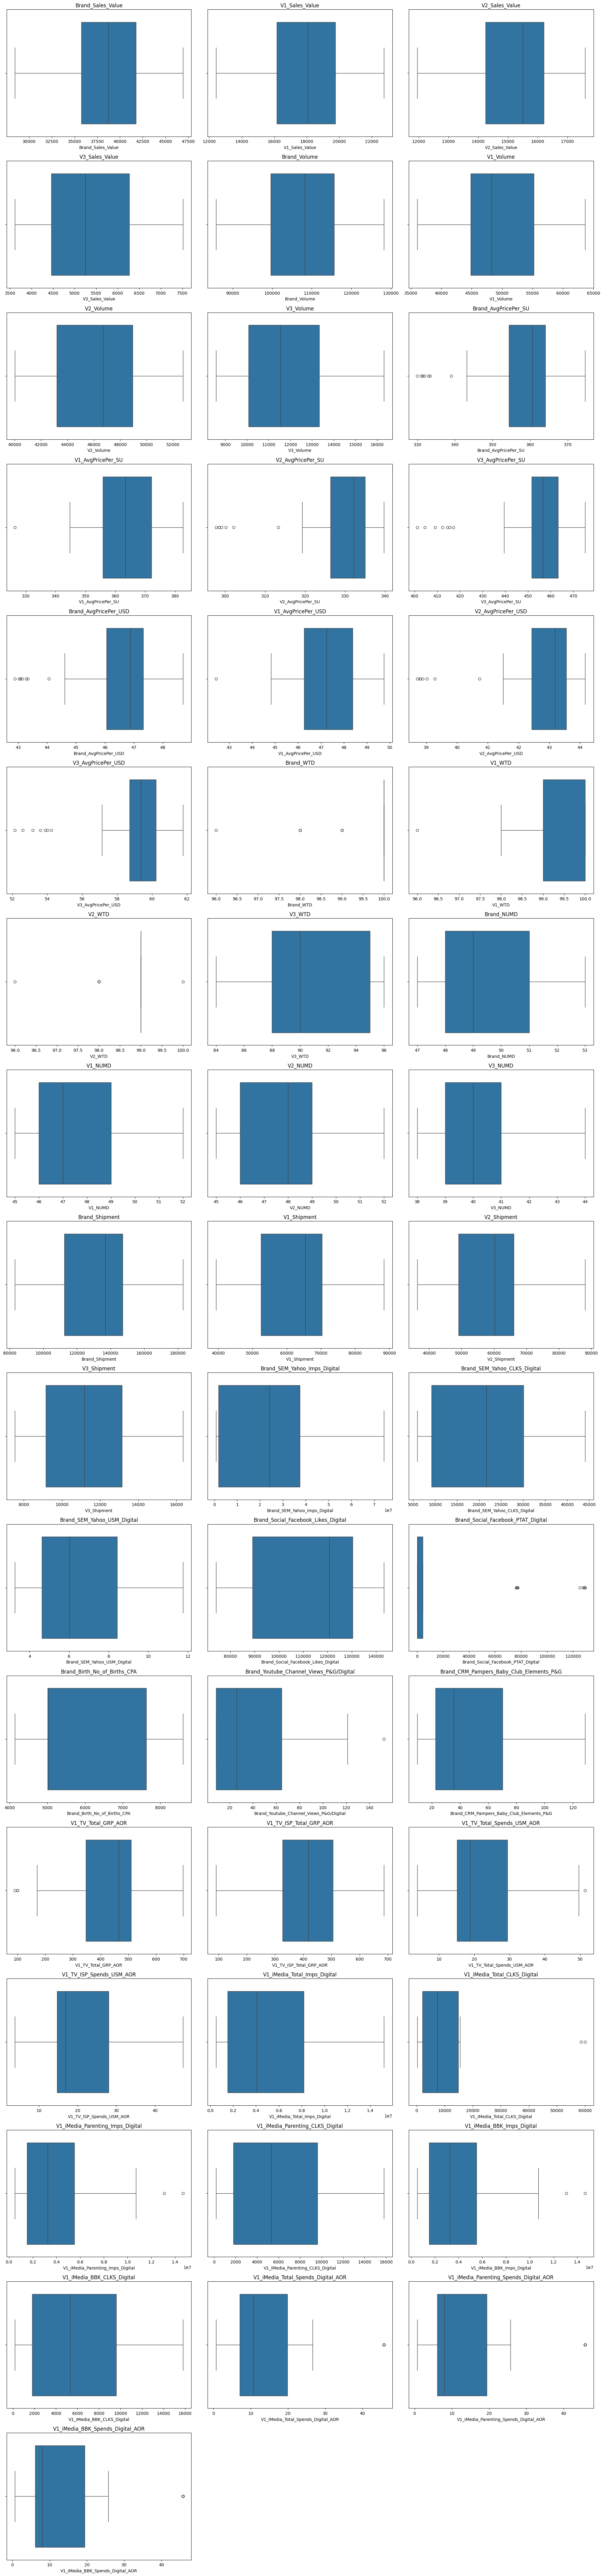

In [177]:
#Determine the number of rows and columns
num_cols = 3
num_rows = (len(merged_media_sales_data.select_dtypes(include=[np.number]).columns) + num_cols - 1 )// num_cols
#Create a subplot with the calculated number of rows and columns
fig,axes = plt.subplots(num_rows,num_cols,figsize=(20,num_rows*5))
axes = axes.flatten()
#Plot the boxplots
for i,col in enumerate(merged_media_sales_data.select_dtypes(include=[np.number]).columns):
    sns.boxplot(ax=axes[i],x=merged_media_sales_data[col])
    axes[i].set_title(col)
#Hide any unused subplots
for j in range(i+1,len(axes)):
    axes[j].axis('off')
#Show the plot
plt.tight_layout()
plt.show()

<div style="font-size:22px;">
Correlation matrix
</div>

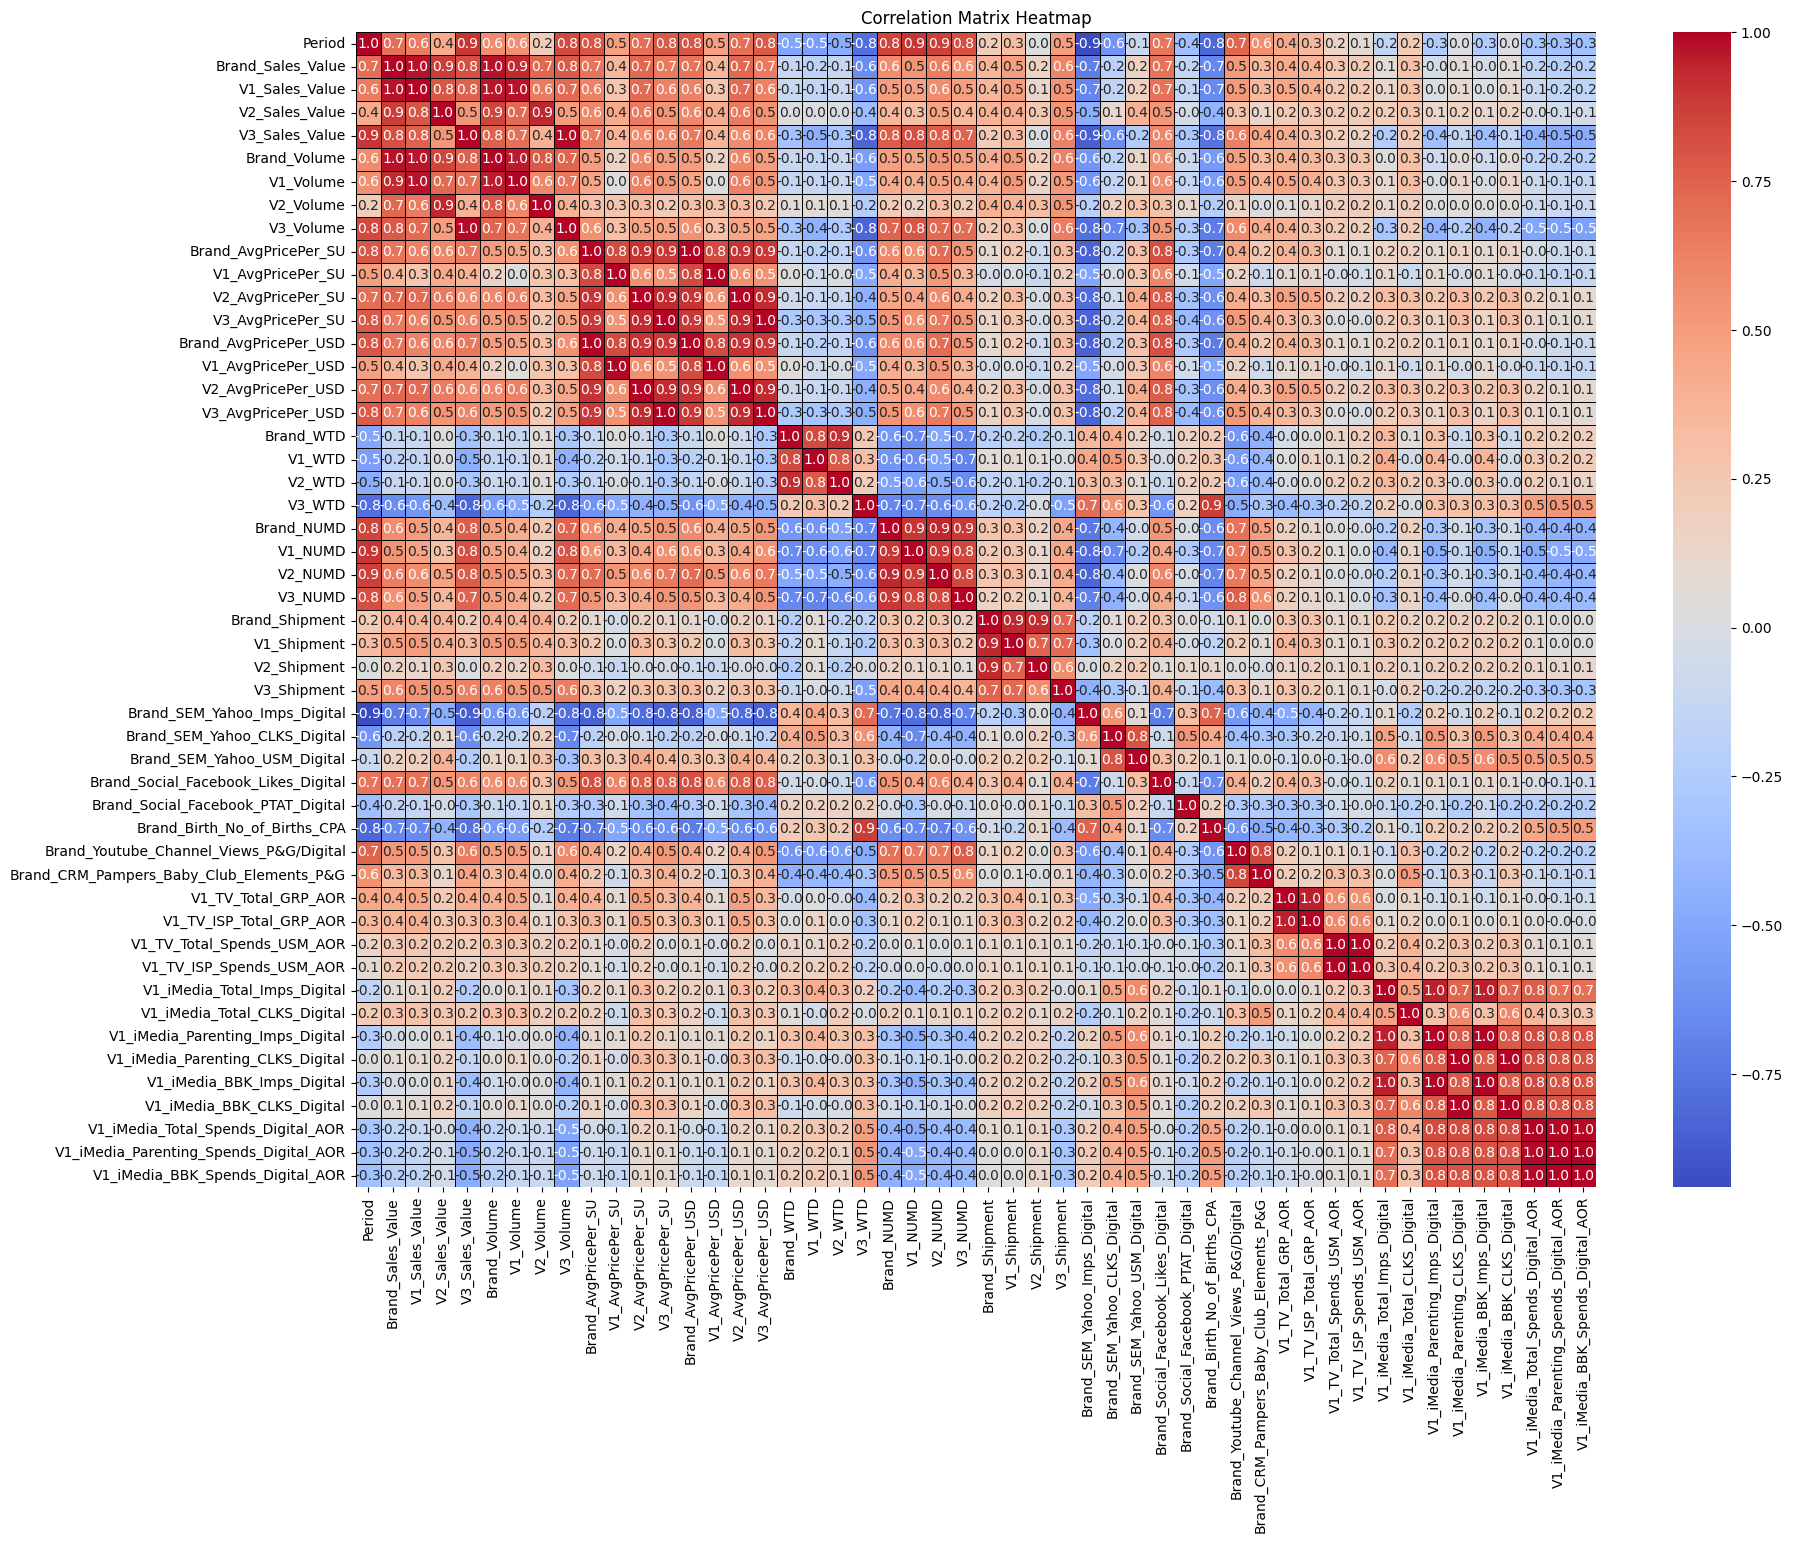

In [178]:
#Compute the correlation matrix
corr_matrix = merged_media_sales_data.corr()
#Adjust the figure size
plt.figure(figsize=(20,15))
#Visualize the heatmap
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.1f',linewidths=0.5,linecolor='black')
#Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

**Visualization**

<div style="font-size:22px;">
Line Chart for Sales Across Period
</div>

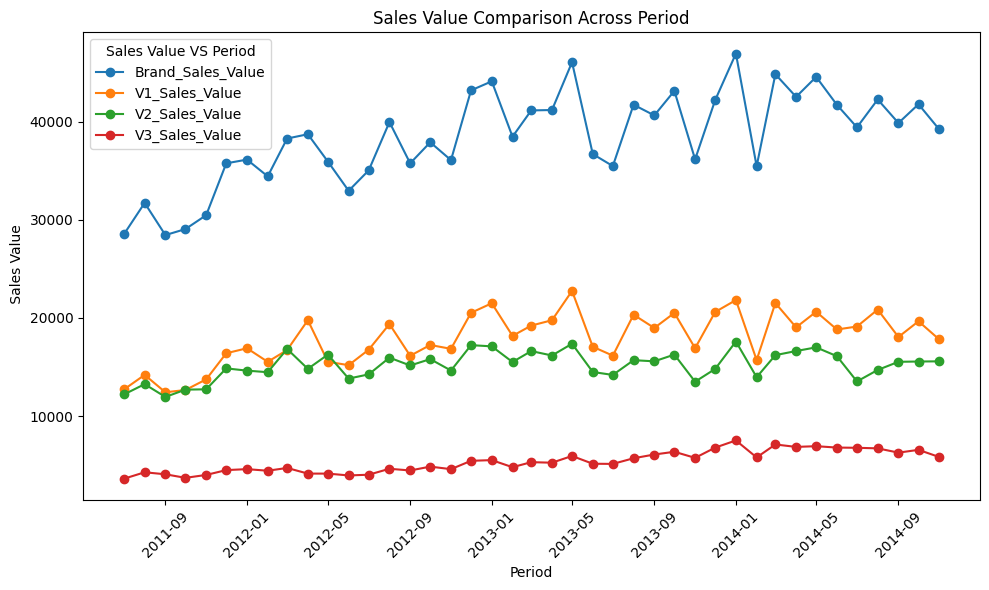

In [179]:
#plot the data
plt.figure(figsize=(10,6))
#plot each column with respect to period
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['Brand_Sales_Value'],label='Brand_Sales_Value',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V1_Sales_Value'],label='V1_Sales_Value',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V2_Sales_Value'],label='V2_Sales_Value',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V3_Sales_Value'],label='V3_Sales_Value',marker='o')
#Customize the plot
plt.title('Sales Value Comparison Across Period')
plt.xlabel('Period')
plt.ylabel(' Sales Value')
plt.xticks(rotation=45)
plt.legend(title='Sales Value VS Period')
#Show plot
plt.tight_layout()
plt.show()

Brand Sales Value -In the Brand Sales Value the value is not uniform with period.The Brand Sales value is highest among all with respect to period.
V1 Sales Value - In the V1 sales value it is also not uniform with period at some point the sales value is increasing or constant or decreasing with respect to period.
V2 Sales Value - In the V2 sales value it is also not uniform with period.
V3 Sales Value - In the V3 sales value the sales value is not much increasing with respect to period.

<div style="font-size:22px;">
Line Chart for Sales and Price Over Period
</div>

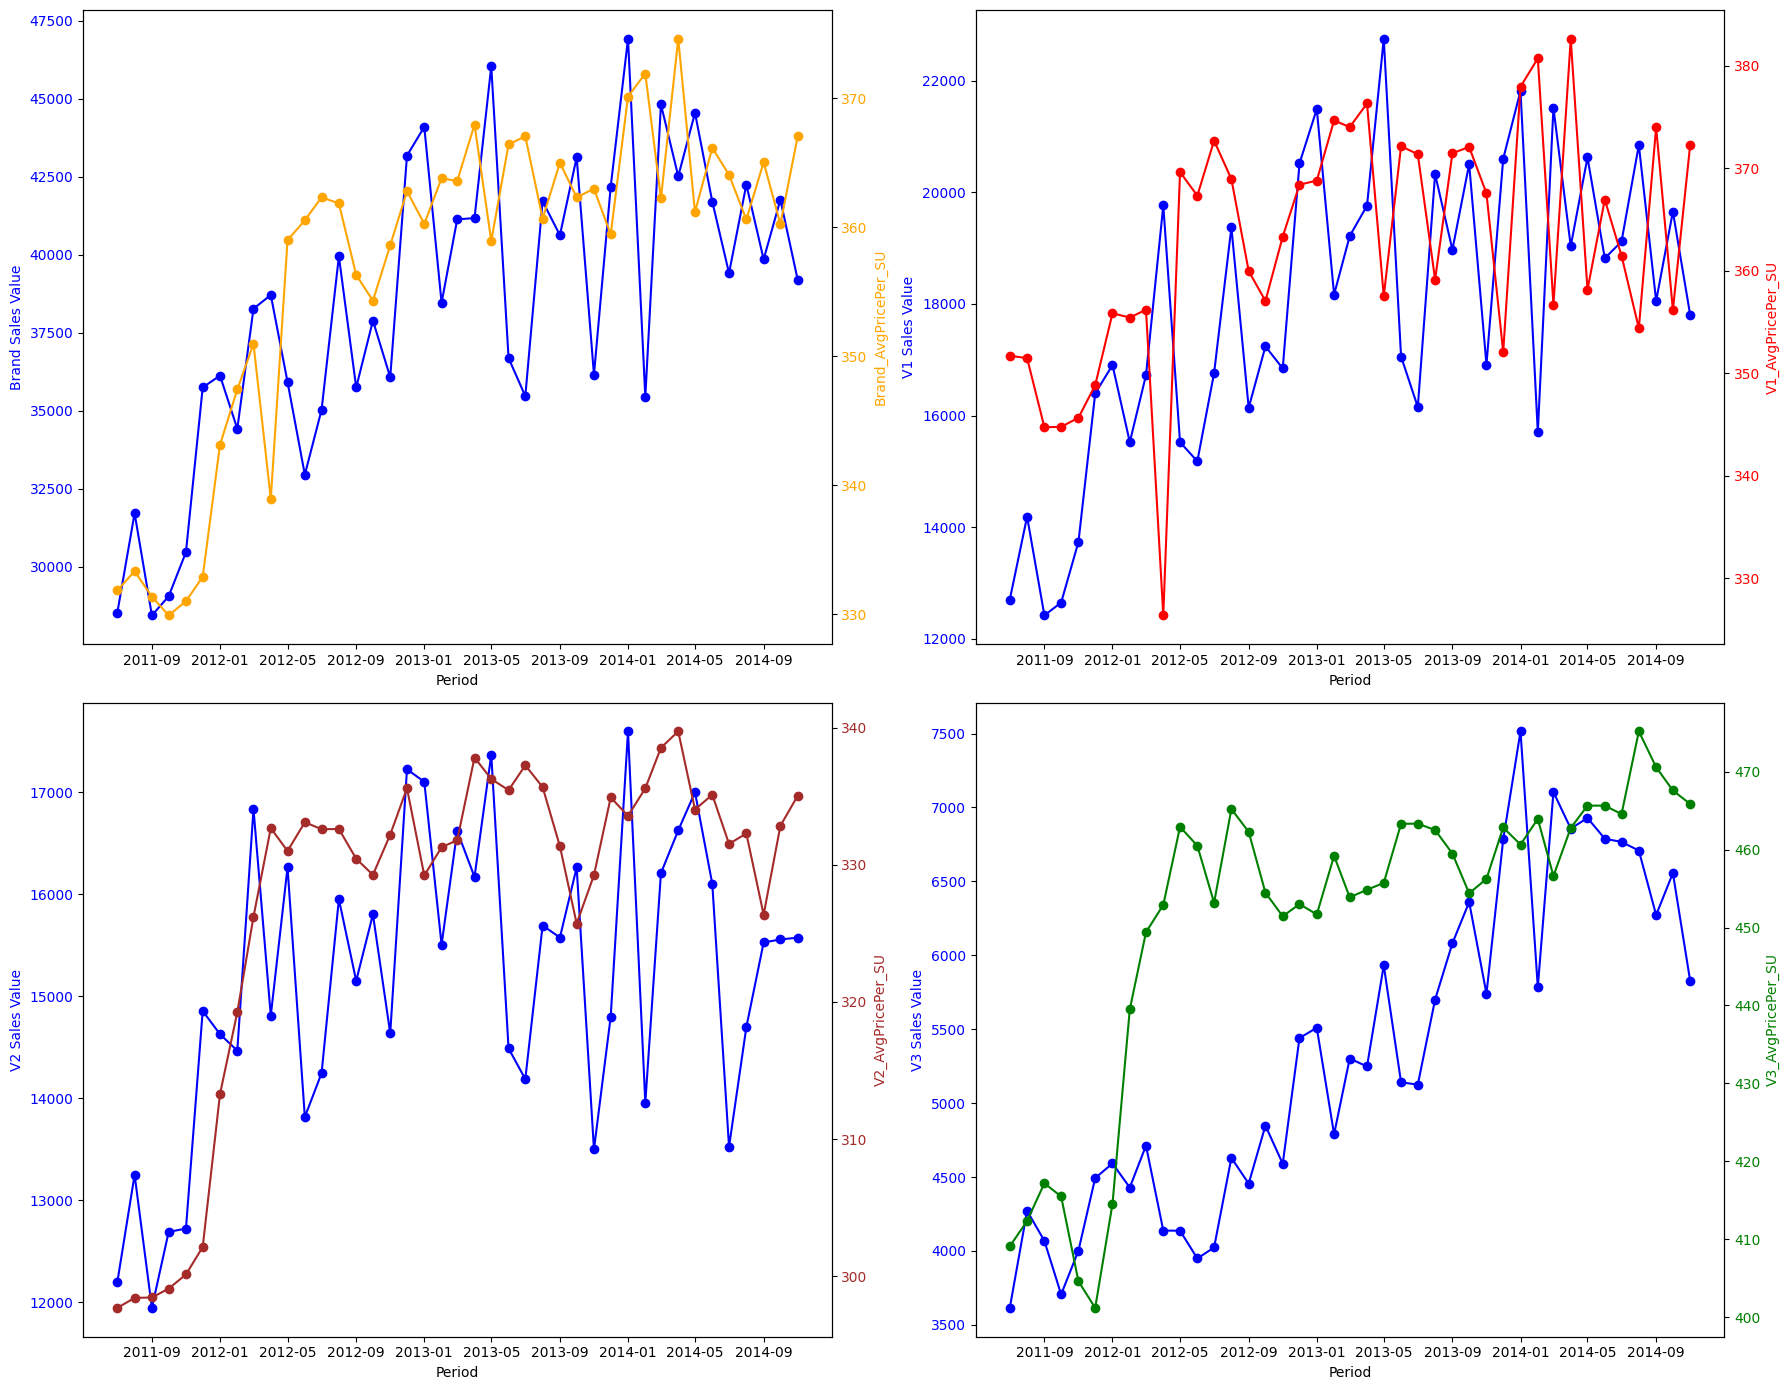

In [180]:
# Create a figure and axis
fig, axs = plt.subplots(2,2,figsize=(18, 14))

# Plotting the first line (Brand Sales Value) on the primary y-axis
ax1 = axs[0,0]
ax1.plot(merged_media_sales_data['Period'], merged_media_sales_data['Brand_Sales_Value'], color='blue',marker='o', label='Sales')
ax1.set_xlabel('Period')
ax1.set_ylabel('Brand Sales Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a secondary y-axis to plot the Brand AvgPricePerSU
ax1_price = ax1.twinx()
ax1_price.plot(merged_media_sales_data['Period'], merged_media_sales_data['Brand_AvgPricePer_SU'], color='orange',marker='o', label='Price')
ax1_price.set_ylabel('Brand_AvgPricePer_SU', color='orange')
ax1_price.tick_params(axis='y', labelcolor='orange')

# Plotting the first line (V1 Sales Value) on the primary y-axis
ax2 = axs[0,1]
ax2.plot(merged_media_sales_data['Period'], merged_media_sales_data['V1_Sales_Value'], color='blue', marker='o', label='Sales')
ax2.set_xlabel('Period')
ax2.set_ylabel('V1 Sales Value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Create a secondary y-axis to plot the V1 AvgPricePerSU
ax2_price = ax2.twinx()
ax2_price.plot(merged_media_sales_data['Period'], merged_media_sales_data['V1_AvgPricePer_SU'], color='red', marker='o', label='Price')
ax2_price.set_ylabel('V1_AvgPricePer_SU', color='red')
ax2_price.tick_params(axis='y', labelcolor='red')

# Plotting the first line (V2 Sales Value) on the primary y-axis
ax3 = axs[1,0]
ax3.plot(merged_media_sales_data['Period'], merged_media_sales_data['V2_Sales_Value'], color='blue', marker='o', label='Sales')
ax3.set_xlabel('Period')
ax3.set_ylabel('V2 Sales Value', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
# Create a secondary y-axis to plot the V2 AvgPricePerSU
ax3_price = ax3.twinx()
ax3_price.plot(merged_media_sales_data['Period'], merged_media_sales_data['V2_AvgPricePer_SU'], color='brown', marker='o', label='Price')
ax3_price.set_ylabel('V2_AvgPricePer_SU', color='brown')
ax3_price.tick_params(axis='y', labelcolor='brown')

# Plotting the first line (V3 Sales Value) on the primary y-axis
ax4 = axs[1,1]
ax4.plot(merged_media_sales_data['Period'], merged_media_sales_data['V3_Sales_Value'], color='blue', marker='o', label='Sales')
ax4.set_xlabel('Period')
ax4.set_ylabel('V3 Sales Value', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')
# Create a secondary y-axis to plot the V3 AvgPricePerSU
ax4_price = ax4.twinx()
ax4_price.plot(merged_media_sales_data['Period'], merged_media_sales_data['V3_AvgPricePer_SU'], color='green', marker='o', label='Price')
ax4_price.set_ylabel('V3_AvgPricePer_SU', color='green')
ax4_price.tick_params(axis='y', labelcolor='green')
# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The above line chart shows that how the sales value and Average Price Per SU changes over Period.

<div style="font-size:22px;">
Line Chart for Shipment Across Period
</div>

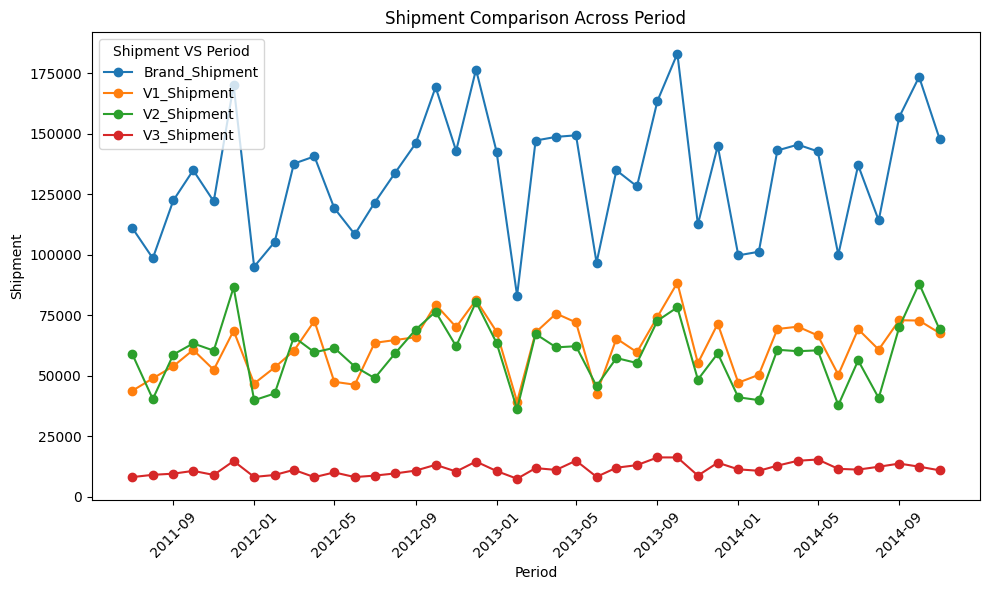

In [181]:
#plot the data
plt.figure(figsize=(10,6))
#plot each column with respect to period
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['Brand_Shipment'],label='Brand_Shipment',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V1_Shipment'],label='V1_Shipment',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V2_Shipment'],label='V2_Shipment',marker='o')
plt.plot(merged_media_sales_data['Period'],merged_media_sales_data['V3_Shipment'],label='V3_Shipment',marker='o')
#Customize the plot
plt.title('Shipment Comparison Across Period')
plt.xlabel('Period')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(title='Shipment VS Period')
#Show plot
plt.tight_layout()
plt.show()

The above line chart shows that how Brand Shipment,V1 Shipment,V2 Shipment and V3 Shipment changes over Period.

<div style="font-size:22px;">
Scatter Plot for Sales Value VS AvgPricePerSU
</div>

In [ ]:
#Create a subplot
fig,axs = plt.subplots(2,2,figsize=(12,10))
#Scatter plot for Brand Sales Value VS Brand_AvgPricePer_SU
sns.regplot(x='Brand_Sales_Value', y= 'Brand_AvgPricePer_SU' , data=merged_media_sales_data , ax=axs[0,0],scatter_kws={'s':50,'color':'blue'},line_kws={'color':'red'})
axs[0,0].set_title('Brand Sales Value VS Brand AvgPricePer_SU')
#Scatter plot for V1 Sales Value VS V1_AvgPricePer_SU
sns.regplot(x='V1_Sales_Value', y= 'V1_AvgPricePer_SU' , data=merged_media_sales_data , ax=axs[0,1],scatter_kws={'s':50,'color':'green'},line_kws={'color':'orange'})
axs[0,1].set_title('V1 Sales Value VS V1 AvgPricePer_SU')
#Scatter plot for V2 Sales Value VS V2_AvgPricePer_SU
sns.regplot(x='V2_Sales_Value', y= 'V2_AvgPricePer_SU' , data=merged_media_sales_data , ax=axs[1,0],scatter_kws={'s':50,'color':'pink'},line_kws={'color':'yellow'})
axs[1,0].set_title('V2 Sales Value VS V2 AvgPricePer_SU')
#Scatter plot for V3 Sales Value VS V3_AvgPricePer_SU
sns.regplot(x='V3_Sales_Value', y= 'V3_AvgPricePer_SU' , data=merged_media_sales_data , ax=axs[1,1],scatter_kws={'s':50,'color':'skyblue'},line_kws={'color':'brown'})
axs[1,1].set_title('V3 Sales Value VS V3 AvgPricePer_SU')
#To Show the plot
plt.tight_layout()
plt.show()

From the above Scatter plot we conclude that:
Brand Sales Value Vs Brand AvgPricePerSU is increasing uniformly.
V1 Sales Value Vs V1 AvgPricePerSU - the avgpriceperSU is not increasing with the same rate as Sales value is increasing.


<div style="font-size:22px;">
Bar Chart for Impression VS Brand Sales Value
</div>

In [ ]:
#Plot a Bar chart to show the the share of impressons for each brand sales value
merged_media_sales_data.set_index('Brand_Sales_Value')['Brand_SEM_Yahoo_Imps_Digital'].plot(kind='bar',figsize=(10,6))
plt.title('Brand Impression Proportion')
plt.ylabel('Brand Impression')
plt.xlabel(' Brand Sales Value')
plt.show()

Brand Impression Proportion - It shows the number of impressions for each brand sales value in the dataset.The X-axis represents the Brand Sales Value 
and the Y - axis represents the impression for each Brand Sales Value.

<div style="font-size:22px;">
Bar Chart for Clicks VS Brand Sales Value
</div>

In [ ]:
#Plot a Bar chart to show the the share of clicks for each brand sales value
merged_media_sales_data.set_index('Brand_Sales_Value')['Brand_SEM_Yahoo_CLKS_Digital'].plot(kind='bar',figsize=(10,6))
plt.title('Brand Clicks Proportion')
plt.ylabel('Brand Clicks')
plt.xlabel('Brand Sales Value')
plt.show()

Brand Clicks Proportion - It shows the number of clicks for each brand sales value in the dataset.The X-axis represents the Brand Sales Value 
and the Y - axis represents the clicks for each Brand Sales Value.

<div style="font-size:22px;">
Pie Chart for Yearly Sales Value
</div>

In [ ]:
#Create a subplot
fig,axs = plt.subplots(2,2,figsize=(10,10))
#Extract the year from the period column
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
merged_media_sales_data['Year'] = merged_media_sales_data['Period'].dt.year
#Sum the total Brand Sales Value by Year 
Brand_Sales_Value_Per_Year = merged_media_sales_data.groupby('Year')['Brand_Sales_Value'].sum()
#Calculate the percentage of total sales value by year
Brand_Sales_Value_Percentage = (Brand_Sales_Value_Per_Year / Brand_Sales_Value_Per_Year.sum())*100
#Sum the total V1 Sales Value by Year 
V1_Sales_Value_Per_Year = merged_media_sales_data.groupby('Year')['V1_Sales_Value'].sum()
#Calculate the percentage of total sales value by year
V1_Sales_Value_Percentage = (V1_Sales_Value_Per_Year / V1_Sales_Value_Per_Year.sum())*100
#Sum the total V2 Sales Value by Year 
V2_Sales_Value_Per_Year = merged_media_sales_data.groupby('Year')['V2_Sales_Value'].sum()
#Calculate the percentage of total sales value by year
V2_Sales_Value_Percentage = (V2_Sales_Value_Per_Year / V2_Sales_Value_Per_Year.sum())*100
#Sum the total V3 Sales Value by Year 
V3_Sales_Value_Per_Year = merged_media_sales_data.groupby('Year')['V3_Sales_Value'].sum()
#Calculate the percentage of total sales value by year
V3_Sales_Value_Percentage = (V3_Sales_Value_Per_Year / V3_Sales_Value_Per_Year.sum())*100
#Visualize the pie chart
#Pie chart for Brand Sales Value
axs[0,0].pie(Brand_Sales_Value_Percentage,labels=Brand_Sales_Value_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,0].set_title('Yearly Brand Sales Value')
#Pie chart for V1 Sales Value
axs[0,1].pie(V1_Sales_Value_Percentage,labels=V1_Sales_Value_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,1].set_title('Yearly V1 Sales Value ')
#Pie chart for V2 Sales Value
axs[1,0].pie(V2_Sales_Value_Percentage,labels=V2_Sales_Value_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,0].set_title('Yearly V2 Sales Value ')
#Pie chart for V3 Sales Value
axs[1,1].pie(V3_Sales_Value_Percentage,labels=V3_Sales_Value_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,1].set_title('Yearly V3 Sales Value')
#Show the plot
plt.tight_layout
plt.show()

This Pie chart shows the total Sales Value yearly.
In Brand Sales Value the highest sales value is in 2013 and lowest in 2011 because the data is available from July 2011.
In V1 Sales Value the highest sales value is in 2013 and lowest in 2011 because the data is available from July 2011. 
In V2 Sales Value the highest sales value is in 2013 and lowest in 2011 because the data is available from July 2011. 
In V3 Sales Value the highest sales value is in 2014 and lowest in 2011 because the data is available from July 2011.

<div style="font-size:22px;">
Pie Chart for Yearly Weighted Distribution
</div>

In [ ]:
#Create a subplot
fig,axs = plt.subplots(2,2,figsize=(10,10))
#Extract the year from the period column
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
merged_media_sales_data['Year'] = merged_media_sales_data['Period'].dt.year
#Sum the total Brand WTD by Year 
Brand_WTD_Per_Year = merged_media_sales_data.groupby('Year')['Brand_WTD'].sum()
#Calculate the percentage of total WTD by year
Brand_WTD_Percentage = (Brand_WTD_Per_Year / Brand_WTD_Per_Year.sum())*100
#Sum the total V1 WTD by Year 
V1_WTD_Per_Year = merged_media_sales_data.groupby('Year')['V1_WTD'].sum()
#Calculate the percentage of total WTD by year
V1_WTD_Percentage = (V1_WTD_Per_Year / V1_WTD_Per_Year.sum())*100
#Sum the total V2 WTD by Year 
V2_WTD_Per_Year = merged_media_sales_data.groupby('Year')['V2_WTD'].sum()
#Calculate the percentage of WTD by year
V2_WTD_Percentage = (V2_WTD_Per_Year / V2_WTD_Per_Year.sum())*100
#Sum the total V3 WTD by Year 
V3_WTD_Per_Year = merged_media_sales_data.groupby('Year')['V3_WTD'].sum()
#Calculate the percentage of total WTD by year
V3_WTD_Percentage = (V3_WTD_Per_Year / V3_WTD_Per_Year.sum())*100
#Visualize the pie chart
#Pie chart for Brand WTD
axs[0,0].pie(Brand_WTD_Percentage,labels=Brand_WTD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,0].set_title('Yearly Brand Weighted Distribution')
#Pie chart for V1 WTD
axs[0,1].pie(V1_WTD_Percentage,labels=V1_WTD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,1].set_title('Yearly V1 Weighted Distribution ')
#Pie chart for V2 WTD
axs[1,0].pie(V2_WTD_Percentage,labels=V2_WTD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,0].set_title('Yearly V2 Weighted Distribution ')
#Pie chart for V3 WTD
axs[1,1].pie(V3_WTD_Percentage,labels=V3_WTD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,1].set_title('Yearly V3 Weighted Distribution')
#Show the plot
plt.tight_layout
plt.show()

This Pie chart shows the total weighted distribution yearly.
In Brand Sales Value the highest weighted distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V1 Sales Value the highest weighted distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V2 Sales Value the highest weighted distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V3 Sales Value the highest weighted distribution is in 2013 and lowest in 2011 because the data is available from July 2011.

<div style="font-size:22px;">
Pie Chart for Yearly Numerical Distribution
</div>

In [ ]:
#Create a subplot
fig,axs = plt.subplots(2,2,figsize=(10,10))
#Extract the year from the period column
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
merged_media_sales_data['Year'] = merged_media_sales_data['Period'].dt.year
#Sum the total Brand NUMD by Year 
Brand_NUMD_Per_Year = merged_media_sales_data.groupby('Year')['Brand_NUMD'].sum()
#Calculate the percentage of total NUMD by year
Brand_NUMD_Percentage = (Brand_NUMD_Per_Year / Brand_NUMD_Per_Year.sum())*100
#Sum the total V1 NUMD by Year 
V1_NUMD_Per_Year = merged_media_sales_data.groupby('Year')['V1_NUMD'].sum()
#Calculate the percentage of total NUMD by year
V1_NUMD_Percentage = (V1_NUMD_Per_Year / V1_NUMD_Per_Year.sum())*100
#Sum the total V2 NUMD by Year 
V2_NUMD_Per_Year = merged_media_sales_data.groupby('Year')['V2_NUMD'].sum()
#Calculate the percentage of total NUMD by year
V2_NUMD_Percentage = (V2_NUMD_Per_Year / V2_NUMD_Per_Year.sum())*100
#Sum the total V3 NUMD by Year 
V3_NUMD_Per_Year = merged_media_sales_data.groupby('Year')['V3_NUMD'].sum()
#Calculate the percentage of total NUMD by year
V3_NUMD_Percentage = (V3_NUMD_Per_Year / V3_NUMD_Per_Year.sum())*100
#Visualize the pie chart
#Pie chart for Brand NUMD
axs[0,0].pie(Brand_NUMD_Percentage,labels=Brand_NUMD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,0].set_title('Yearly Brand Numerical Distribution')
#Pie chart for V1 NUMD
axs[0,1].pie(V1_NUMD_Percentage,labels=V1_NUMD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[0,1].set_title('Yearly V1 Numerical Distribution ')
#Pie chart for V2 NUMD
axs[1,0].pie(V2_NUMD_Percentage,labels=V2_NUMD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,0].set_title('Yearly V2 Numerical Distribution ')
#Pie chart for V3 NUMD
axs[1,1].pie(V3_NUMD_Percentage,labels=V3_NUMD_Percentage.index,autopct='%1.1f%%',startangle=90)
axs[1,1].set_title('Yearly V3 Numerical Distribution')
#Show the plot
plt.tight_layout
plt.show()

This Pie chart shows the total numerical distribution yearly.
In Brand Sales Value the highest numerical distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V1 Sales Value the highest numerical distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V2 Sales Value the highest numerical distribution is in 2013 and lowest in 2011 because the data is available from July 2011.
In V3 Sales Value the highest numerical distribution is in 2013 and lowest in 2011 because the data is available from July 2011.

<div style="font-size:22px;">
Histogram for Monthly Brand AvgPricePerSU
</div>

In [ ]:
#Convert Period to datetime
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
#Extract month from period
merged_media_sales_data['month'] = merged_media_sales_data['Period'].dt.month
#define month names
month_names= ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
#Find the month with maximum and minimum average price
monthly_avgprice = merged_media_sales_data.groupby('month')['Brand_AvgPricePer_SU'].sum()
max_month = monthly_avgprice.idxmax()
min_month = monthly_avgprice.idxmin()
max_price = monthly_avgprice[max_month]
min_price = monthly_avgprice[min_month]
#Plot the histogram with month on the x-axis and Brand AvgPricePer_SU on the y-axis
plt.figure(figsize=(10,6))
plt.hist(merged_media_sales_data['month'],weights=merged_media_sales_data['Brand_AvgPricePer_SU'],bins=12,edgecolor='black')
#Adding labels and titles
plt.title('Histogram of Brand AvgPricePer_SU Month-wise')
plt.xlabel('Month')
plt.ylabel('Brand_AvgPricePer_SU')
#set x-axis ticks to month names
plt.xticks(ticks=range(1,13),labels=month_names,rotation=45)
#annotate the maximum and minimum average price month
plt.text(max_month-1,max_price,f'Max:{max_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='red')
plt.text(min_month-1,min_price,f'Min:{min_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='brown')
#Show the plot
plt.tight_layout()
plt.show()

Brand Average Per SU is highest in July and lowest in December.

<div style="font-size:22px;">
Histogram for Monthly V1 AvgPricePerSU
</div>


In [ ]:
#Convert Period to datetime
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
#Extract month from period
merged_media_sales_data['month'] = merged_media_sales_data['Period'].dt.month
#define month names
month_names= ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
#Find the month with maximum and minimum average price
monthly_avgprice = merged_media_sales_data.groupby('month')['V1_AvgPricePer_SU'].sum()
max_month = monthly_avgprice.idxmax()
min_month = monthly_avgprice.idxmin()
max_price = monthly_avgprice.max()
min_price = monthly_avgprice.min()
#Plot the histogram with month on the x-axis and V1 AvgPricePer_SU on the y-axis
plt.figure(figsize=(10,6))
plt.hist(merged_media_sales_data['month'],weights=merged_media_sales_data['V1_AvgPricePer_SU'],bins=12,edgecolor='black')
#Adding labels and titles
plt.title('Histogram of V1 AvgPricePer_SU Month-wise')
plt.xlabel('Month')
plt.ylabel('V1_AvgPricePer_SU')
#set x-axis ticks to month names
plt.xticks(ticks=range(1,13),labels=month_names,rotation=45)
#annotate the maximum and minimum average price month
plt.text(max_month-1,max_price,f'Max:{max_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='red')
plt.text(min_month-1,min_price,f'Min:{min_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='brown')
#Show the plot
plt.tight_layout()
plt.show()

V1 Average Per SU is highest in July and lowest in December.

<div style="font-size:22px;">
Histogram for Monthly V2 AvgPricePerSU
</div>

In [ ]:
#Convert Period to datetime
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
#Extract month from period
merged_media_sales_data['month'] = merged_media_sales_data['Period'].dt.month
#define month names
month_names= ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
#Find the month with maximum and minimum average price
monthly_avgprice = merged_media_sales_data.groupby('month')['V2_AvgPricePer_SU'].sum()
max_month = monthly_avgprice.idxmax()
min_month = monthly_avgprice.idxmin()
max_price = monthly_avgprice.max()
min_price = monthly_avgprice.min()
#Plot the histogram with month on the x-axis and V2 AvgPricePer_SU on the y-axis
plt.figure(figsize=(10,6))
plt.hist(merged_media_sales_data['month'],weights=merged_media_sales_data['V2_AvgPricePer_SU'],bins=12,edgecolor='black')
#Adding labels and titles
plt.title('Histogram of V2 AvgPricePer_SU Month-wise')
plt.xlabel('Month')
plt.ylabel('V2_AvgPricePer_SU')
#set x-axis ticks to month names
plt.xticks(ticks=range(1,13),labels=month_names,rotation=45)
#annotate the maximum and minimum average price month
plt.text(max_month-1,max_price,f'Max:{max_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='red')
plt.text(min_month-1,min_price,f'Min:{min_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=14,color='brown')
#Show the plot
plt.tight_layout()
plt.show()

V2 Average Per SU is highest in July and lowest in December.

<div style="font-size:22px;">
Histogram for Monthly V3 AvgPricePerSU
</div>


In [ ]:
#Convert Period to datetime
merged_media_sales_data['Period'] = pd.to_datetime(merged_media_sales_data['Period'])
#Extract month from period
merged_media_sales_data['month'] = merged_media_sales_data['Period'].dt.month
#define month names
month_names= ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
#Find the month with maximum and minimum average price
monthly_avgprice = merged_media_sales_data.groupby('month')['V3_AvgPricePer_SU'].sum()
max_month = monthly_avgprice.idxmax()
min_month = monthly_avgprice.idxmin()
max_price = monthly_avgprice.max()
min_price = monthly_avgprice.min()
#Plot the histogram with month on the x-axis and V1 AvgPricePer_SU on the y-axis
plt.figure(figsize=(10,6))
plt.hist(merged_media_sales_data['month'],weights=merged_media_sales_data['V3_AvgPricePer_SU'],bins=12,edgecolor='black')
#Adding labels and titles
plt.title('Histogram of V3 AvgPricePer_SU Month-wise')
plt.xlabel('Month')
plt.ylabel('V3_AvgPricePer_SU')
#set x-axis ticks to month names
plt.xticks(ticks=range(1,13),labels=month_names,rotation=45)
#annotate the maximum and minimum average price month
plt.text(max_month-1,max_price,f'Max:{max_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=12,color='red')
plt.text(min_month-1,min_price,f'Min:{min_price:.1f}',horizontalalignment='center',verticalalignment='bottom',fontsize=12,color='brown')
#Show the plot
plt.tight_layout()
plt.show()

V3 Average Per SU is highest in July and lowest in December.

In [ ]:
merged_media_sales_data['Month_1'] = merged_media_sales_data['Period'].dt.month==1
merged_media_sales_data['Month_3'] = merged_media_sales_data['Period'].dt.month==3
merged_media_sales_data['Month_4'] = merged_media_sales_data['Period'].dt.month==4
merged_media_sales_data['Month_5'] = merged_media_sales_data['Period'].dt.month==5
merged_media_sales_data['Month_7'] = merged_media_sales_data['Period'].dt.month==7
merged_media_sales_data['Month_8'] = merged_media_sales_data['Period'].dt.month==8
merged_media_sales_data['Month_10'] = merged_media_sales_data['Period'].dt.month==10
merged_media_sales_data['Month_11'] = merged_media_sales_data['Period'].dt.month==11

<span style="font-size: 26px; font-weight: bold;">Model Training</span>

<span style="font-size: 24px; font-weight: bold;">Linear Regression</span>

<div style="font-size:22px;">
Model Training for Brand Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] #target values

In [ ]:
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)              

In [ ]:
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)

In [ ]:
#Predict the brand sales value for the test data
y_pred_linear = model.predict(X_test)

In [ ]:
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_linear)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_linear)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_linear)/ y_test))*100

In [ ]:
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

In [ ]:
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('Brand Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
Model Training for V1 Sales Data
</div>

In [ ]:
#Adstock function 
def adstock(series,decay_factor):
    adstocked = []
    previous_adstock= 0 #Initial previous adstock is zero
    for grps in series:
        current_adstock = grps + decay_factor*previous_adstock
        adstocked.append(current_adstock)
        previous_adstock = current_adstock
    return pd.Series(adstocked,index=series.index)
#Apply adstock transformation
decay_factor = 0.5 
merged_media_sales_data['Adstocked_V1_TV_Total_GRP_AOR'] = adstock(merged_media_sales_data['V1_TV_Total_GRP_AOR'],decay_factor)

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']] #target values

In [ ]:
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)

In [ ]:
#Predict the V1 sales value for the test data
y_pred_linear = model.predict(X_test)

In [ ]:
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_linear)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_linear)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_linear)/ y_test))*100

In [ ]:
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

In [ ]:
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('V1 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
Model Training for V2 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values

In [ ]:
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)

In [ ]:
#Predict the V2 sales value for the test data
y_pred_linear = model.predict(X_test)

In [ ]:
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_linear)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_linear)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_linear)/ y_test))*100

In [ ]:
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

In [ ]:
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('V2 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
Model Training for V3 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)

In [ ]:
#Predict the V3 sales value for the test data
y_pred_linear = model.predict(X_test)

In [ ]:
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_linear)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_linear)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_linear)/ y_test))*100

In [ ]:
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

In [ ]:
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period (V3)')
plt.xlabel('Period')
plt.ylabel('V3 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()


<span style="font-size: 24px; font-weight: bold;">Lasso Regression</span>

<div style="font-size:22px;">
Model Training for Brand Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  
#create a lasso model
alpha_value = 0.1
lasso_model = Lasso(alpha=alpha_value,random_state=42)
lasso_model.fit(X_train,y_train)
#make predictions
y_pred_lasso = lasso_model.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_lasso)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_lasso)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_lasso) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V1 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a Lasso model
alpha_value = 0.1
lasso_model = Lasso(alpha=alpha_value,random_state=42)
lasso_model.fit(X_train,y_train)
#make predictions
y_pred_lasso = lasso_model.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_lasso)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_lasso)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_lasso) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V2 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
#make predictions
y_pred_lasso = lasso_model.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_lasso)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_lasso)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_lasso) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V3 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train,y_train)
#make predictions
y_pred_lasso = lasso_model.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_lasso)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_lasso)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_lasso) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<span style="font-size: 24px; font-weight: bold;">Ridge Regression</span>

<div style="font-size:22px;">
Model Training for Brand Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#make predictions
y_pred_ridge = ridge.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_ridge)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_ridge)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_ridge)/ y_test))*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V1 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#make predictions
y_pred_ridge = ridge.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_ridge)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_ridge)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_ridge)/ y_test))*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V2 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#make predictions
y_pred_ridge = ridge.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_ridge)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_ridge)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_ridge)/ y_test))*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
Model Training for V3 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#make predictions
y_pred_ridge = ridge.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_ridge)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_ridge)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = np.mean(np.abs((y_test - y_pred_ridge)/ y_test))*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')


<span style="font-size: 24px; font-weight: bold;">Random Forest Regressor</span>

<div style="font-size:22px;">
 for Brand Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
#Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_rf)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_rf)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_rf) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
 for V1 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y= merged_media_sales_data[['V1_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
#Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_rf)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_rf)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_rf) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
for V2 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
#Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_rf)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_rf)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_rf)*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
 for V3 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
rf_regressor.fit(X_train, y_train)
#Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_rf)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_rf)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_rf) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<span style="font-size: 24px; font-weight: bold;">XGBoost</span>

<div style="font-size:22px;">
 for Brand Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
# Train the model
xg_reg.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xg_reg.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_xgb)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_xgb)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_xgb) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
 for V1 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
# Train the model
xg_reg.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xg_reg.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_xgb)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_xgb)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_xgb) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
 for V2 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
# Train the model
xg_reg.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xg_reg.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_xgb)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_xgb)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_xgb)*100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<div style="font-size:22px;">
 for V3 Sales Data
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
# Train the model
xg_reg.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xg_reg.predict(X_test)
#Evaluate the model
#Calculate mse
mse = mean_squared_error(y_test,y_pred_xgb)
#Calculate rmse
rmse = np.sqrt(mse)
#Calculate R-squared
r2 = r2_score(y_test,y_pred_xgb)
#Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
#Calculate Mape
mape = mean_absolute_percentage_error(y_test,y_pred_xgb) * 100
#Print the result
print(f'Mean Squared Error (mse):{mse}')
print(f'Root Mean Squared Error (rmse):{rmse}')
print(f'R-squared (r2):{r2}')
print(f'Adjusted R-squared (adj_r2):{adj_r2}')
print(f'Mean Absolute Percentage Error (mape):{mape}')

<span style="font-size: 24px; font-weight: bold;">Comparison table of All Models</span>

In [ ]:
data = {
    'Model': ['Brand', 'Brand', 'Brand', 'Brand', 'Brand',
              'V1', 'V1', 'V1', 'V1', 'V1',
              'V2', 'V2', 'V2', 'V2', 'V2',
              'V3', 'V3', 'V3', 'V3', 'V3'],
    'Algorithm': ['Linear', 'Lasso', 'Ridge', 'RandomForest', 'XGBoost',
                  'Linear', 'Lasso', 'Ridge', 'RandomForest', 'XGBoost',
                  'Linear', 'Lasso', 'Ridge', 'RandomForest', 'XGBoost',
                  'Linear', 'Lasso', 'Ridge', 'RandomForest', 'XGBoost'],
    'MAPE': [3.05333057, 3.05328355, 3.046249968, 3.93250715, 3.8716383671,
             4.5596700 , 4.563013167 , 4.6249742 , 7.4839774, 8.3983164,
             2.65091894 , 2.65404822 , 2.75360630, 5.540969, 5.4816192,
             5.0146632, 5.018218 ,  5.034698, 9.4000628, 10.47735],
    'R-squared': [0.826668017, 0.82661007 , 0.821898993, 0.8044087, 0.7626996,
                   0.78721301, 0.7868879 , 0.77980878,  0.40963868, 0.19685230,
                  0.777923907,  0.77742245  , 0.7618670, 0.2379836175, 0.3349915,
                   0.8840020256, 0.88373050, 0.8823001654, 0.483462770, 0.26470661]
}

df_results = pd.DataFrame(data)
df_results['MAPE'] = df_results['MAPE'].round(5)
df_results['R-squared'] = df_results['R-squared'].round(5)
# Display the DataFrame (table)
df_results

<div style="font-size:22px;">
Finalizing the Model
</div>

**Ridge Regression on Brand Sales Value** gave the best R-squared score (0.82190) and the lowest MAPE (3.04625)

**Linear Regression on V1 Sales Value** gave the best R-squared score (0.78721) and the lowest MAPE (4.5596)

**Linear Regression on V2 Sales Value** gave the best R-squared score (0.77792) and the lowest MAPE (2.65092)

**Linear Regression on V3 Sales Value** gave the best R-squared score (0.88400) and the lowest MAPE (5.01466)

<span style="font-size: 24px; font-weight: bold;">Actual VS Predicted Sales Value Over Period (For Final Models)</span>

<div style="font-size:22px;">
For Brand Sales Value
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] 
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#make predictions
y_pred_ridge = ridge.predict(X_test)
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_ridge,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('Brand Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
For V1 Sales Value
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']]
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Predict the V1 sales value for the test data
y_pred_linear = model.predict(X_test)
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('V1 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
For V2 Sales Value
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Predict the V1 sales value for the test data
y_pred_linear = model.predict(X_test)
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('V2 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<div style="font-size:22px;">
For V3 Sales Value
</div>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Predict the V1 sales value for the test data
y_pred_linear = model.predict(X_test)
#Get the indices from the y_Brand_test to align with the period column
test_indices = y_test.index
#Get corresponding periods for test set
test_periods = merged_media_sales_data.loc[test_indices,'Period']
#sort it by index
test_periods = test_periods.sort_index()
#Plot Actual VS Predicted Sales Value
plt.figure(figsize=(10,6))
plt.plot(test_periods,y_test,label='Actual Sales',color='blue',marker='o',linestyle='-')
plt.plot(test_periods,y_pred_linear,label='Predicted Sales',color='red',marker='x',linestyle='--')
#Add labels and titles 
plt.title('Actual VS Predicted Sales Over Period')
plt.xlabel('Period')
plt.ylabel('V3 Sales Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
#show the plot
plt.show()

<span style="font-size: 24px; font-weight: bold;">Contribution Chart</span>

<span style="font-size: 22px;">For Brand Sales Value</span>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['Brand_AvgPricePer_SU','Brand_Social_Facebook_Likes_Digital','Brand_Shipment','Month_7','Month_3','Month_5']]
y = merged_media_sales_data[['Brand_Sales_Value']] 
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) 
#Create a ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
#Rename Columns
X = X.copy()
X.rename(columns={'Brand_AvgPricePer_SU': 'Brand_Avg_Price', 'Brand_Social_Facebook_Likes_Digital': 'Brand__FB_Likes','Month_7': 'July',
'Month_3': 'March','Month_5': 'May'}, inplace=True)
# CALCULATE THE COEFFICIENTS
coefficients = ridge.coef_
absolute_coefficients = np.abs(coefficients)
# Print the coefficients for each feature
print("Ridge Model Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature}: {absolute_coefficients[0][i]}")
absolute_coefficients = absolute_coefficients.flatten()   
#CALCULATE THE AVERAGE OF EACH COLUMN OF X
averages = X.mean()
#MULTIPLY THE COEFFICIENTS BY THE AVERAGE OF EACH COLUMN
contributions =  absolute_coefficients * averages
#CALCULATE THE PERCENTAGE CONTRIBUTION OF EACH FEATURE
total_contribution = contributions.sum()
percentage_contributions = (contributions / total_contribution) * 100
# Sort the  percentage_contributions in descending order
percentage_contributions= percentage_contributions.sort_values(ascending=False)
#Plot the contribution chart (bar plot)
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_contributions.index, percentage_contributions, color='blue')
plt.title('Brand Model : Feature Contribution', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage Contribution ')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
# Add the percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (contribution percentage)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Positioning the text slightly above the bar
             f'{yval:.2f}%', ha='center', va='bottom', fontsize=13)  # Display the percentage
plt.show()

In Brand Contribution Chart, Brand_Avg_Price has the highest impact on contribution chart which suggests that the feature is increasing the model’s prediction of the target variable.

<span style="font-size: 22px;">For V1 Sales Value</span>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V1_NUMD','V2_AvgPricePer_SU','V1_iMedia_Parenting_CLKS_Digital','V1_Shipment',
                              'V3_NUMD', 'Adstocked_V1_TV_Total_GRP_AOR','Month_7','Month_8','Month_10','Month_11']] 
y = merged_media_sales_data[['V1_Sales_Value']]
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Rename Columns
X = X.copy()
X.rename(columns={'V2_AvgPricePer_SU': 'V2_Avg_Price', 'Adstocked_V1_TV_Total_GRP_AOR': 'V1_Adstocked_TV_GRP_50%','Month_7': 'July',
'Month_8': 'August','Month_10': 'October','Month_11': 'November','V1_iMedia_Parenting_CLKS_Digital': 'V1_iMedia_CLKS'}, inplace=True)
# CALCULATE THE COEFFICIENTS
coefficients = model.coef_
absolute_coefficients = np.abs(coefficients)
# Print the coefficients for each feature
print("Linear Model Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature}: {absolute_coefficients[0][i]}")
absolute_coefficients = absolute_coefficients.flatten()   
#CALCULATE THE AVERAGE OF EACH COLUMN OF X
averages = X.mean()
#MULTIPLY THE COEFFICIENTS BY THE AVERAGE OF EACH COLUMN
contributions =  absolute_coefficients * averages
#CALCULATE THE PERCENTAGE CONTRIBUTION OF EACH FEATURE
total_contribution = contributions.sum()
percentage_contributions = (contributions / total_contribution) * 100
# Sort the  percentage_contributions in descending order
percentage_contributions= percentage_contributions.sort_values(ascending=False)
#Plot the contribution chart (bar plot)
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_contributions.index, percentage_contributions, color='blue')
plt.title('V1 Model : Feature Contribution', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Percentage Contribution')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
# Add the percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (contribution percentage)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Positioning the text slightly above the bar
             f'{yval:.2f}%', ha='center', va='bottom', fontsize=13)  # Display the percentage
plt.show()

V3_NUMD  has the highest impact on contribution chart which suggests that the feature is increasing the model’s prediction of the target variable.

<span style="font-size: 22px;">For V2 Sales Value</span>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V2_AvgPricePer_SU','Adstocked_V1_TV_Total_GRP_AOR','V1_TV_Total_Spends_USM_AOR','Month_7','Month_1','Month_3',]] 
y = merged_media_sales_data[['V2_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Rename Columns
X = X.copy()
X.rename(columns={'V2_AvgPricePer_SU': 'V2_Avg_Price', 'Adstocked_V1_TV_Total_GRP_AOR': 'V1_Adstocked_TV_GRP_50%','Month_7': 'July'
                 ,'Month_1': 'January','Month_3': 'March','V1_TV_Total_Spends_USM_AOR': 'V1_TV_Spends'}, inplace=True)
# CALCULATE THE COEFFICIENTS
coefficients = model.coef_
absolute_coefficients = np.abs(coefficients)
# Print the coefficients for each feature
print("Linear Model Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature}: {absolute_coefficients[0][i]}")
absolute_coefficients = absolute_coefficients.flatten()   
#CALCULATE THE AVERAGE OF EACH COLUMN OF X
averages = X.mean()
#MULTIPLY THE COEFFICIENTS BY THE AVERAGE OF EACH COLUMN
contributions =  absolute_coefficients * averages
#CALCULATE THE PERCENTAGE CONTRIBUTION OF EACH FEATURE
total_contribution = contributions.sum()
percentage_contributions = (contributions / total_contribution) * 100
# Sort the  percentage_contributions in descending order
percentage_contributions= percentage_contributions.sort_values(ascending=False)
#Plot the contribution chart (bar plot)
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_contributions.index, percentage_contributions, color='blue')
plt.title('V2 Model : Feature Contribution' , fontsize=14)
plt.xlabel('Features')
plt.ylabel('Percentage Contribution')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
# Add the percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (contribution percentage)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Positioning the text slightly above the bar
             f'{yval:.2f}%', ha='center', va='bottom', fontsize=13)  # Display the percentage
plt.show()

 V2_Avg_Price has the highest impact on contribution chart which suggests that the feature is increasing the model’s prediction of the target variable.

<span style="font-size: 22px;">For V3 Sales Value</span>

In [ ]:
#Split the data into X and y
X = merged_media_sales_data[['V3_AvgPricePer_SU','V3_Shipment','V1_WTD','V2_WTD','V1_Shipment','Adstocked_V1_TV_Total_GRP_AOR','Month_4']]   
y= merged_media_sales_data[['V3_Sales_Value']] #target values
# Split into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Create a linear regression model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
#Rename Columns
X = X.copy()
X.rename(columns={'V3_AvgPricePer_SU': 'V3_Avg_Price', 'Adstocked_V1_TV_Total_GRP_AOR': 'V1_Adstocked_TV_GRP_50%','Month_4': 'April'}, inplace=True)
# CALCULATE THE COEFFICIENTS
coefficients = model.coef_
#Absolute Coefficients
absolute_coefficients = np.abs(coefficients)
print("Linear Model Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"Coefficient for {feature}: {absolute_coefficients[0][i]}")
absolute_coefficients = absolute_coefficients.flatten()   
#CALCULATE THE AVERAGE OF EACH COLUMN OF X
averages = X.mean()
#MULTIPLY THE COEFFICIENTS BY THE AVERAGE OF EACH COLUMN
contributions =  absolute_coefficients * averages
#CALCULATE THE PERCENTAGE CONTRIBUTION OF EACH FEATURE
total_contribution = contributions.sum()
percentage_contributions = (contributions / total_contribution) * 100
# Sort the  percentage_contributions in descending order
percentage_contributions= percentage_contributions.sort_values(ascending=False)
#Plot the contribution chart (bar plot)
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage_contributions.index, percentage_contributions, color='blue')
plt.title('V3 Model : Feature Contribution', fontsize=14)
plt.xlabel('Features')
plt.ylabel('Percentage Contribution')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
# Add the percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (contribution percentage)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Positioning the text slightly above the bar
             f'{yval:.2f}%', ha='center', va='bottom', fontsize=13)  # Display the percentage
plt.show()

V1_WTD has the highest impact on contribution chart which suggests that the feature is increasing the model’s prediction of the target variable.